In [31]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Genotype classification based on measured kinematic features on mice

## Import necessary libraries

In [1]:
import J20

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be remo

In [ ]:
‘explained_variance’

metrics.explained_variance_score

‘max_error’

metrics.max_error

‘neg_mean_absolute_error’

metrics.mean_absolute_error

‘neg_mean_squared_error’

metrics.mean_squared_error

‘neg_root_mean_squared_error’

metrics.mean_squared_error

‘neg_mean_squared_log_error’

metrics.mean_squared_log_error

‘neg_median_absolute_error’

metrics.median_absolute_error

‘r2’

metrics.r2_score

‘neg_mean_poisson_deviance’

metrics.mean_poisson_deviance

‘neg_mean_gamma_deviance’

metrics.mean_gamma_deviance

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import sem
import copy

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler ,RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, \
                                    cross_val_predict, GridSearchCV, LeaveOneOut, LeavePOut
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, f1_score, r2_score,\
                            mean_absolute_error, mean_squared_error, explained_variance_score,\
                            precision_score, average_precision_score, recall_score, brier_score_loss 
from sklearn.inspection import permutation_importance
from sklearn import svm
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, \
                             ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier,\
                             VotingClassifier, StackingClassifier
from sklearn.ensemble.forest import _generate_unsampled_indices
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB, MultinomialNB,  GaussianNB, ComplementNB

from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, label_binarize, OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from sklearn.utils import resample
from sklearn.utils.multiclass import unique_labels
from sklearn.pipeline import Pipeline
from sklearn_hierarchical_classification.classifier import HierarchicalClassifier
from sklearn_hierarchical_classification.constants import ROOT
from sklearn_hierarchical_classification.metrics import h_fbeta_score

import xgboost as xgb

import eli5
from eli5.sklearn import PermutationImportance
from eli5.permutation_importance import get_score_importances
from eli5 import explain_prediction_df

from PIL import Image
from io import BytesIO

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

from IPython.display import HTML

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# the mcnemar test
from statsmodels.stats.contingency_tables import mcnemar

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.nearest_centroid module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be remo

## Preparing the Train and Test datasets

> Bilateral (including both Right and Left side recordongd in on single dataset)

In [4]:
test = pd.read_csv('df_merge.csv',  index_col=None)

In [5]:
test = test.drop(columns = ['Unnamed: 0'])

In [6]:
df_merge = test

In [7]:
df_merge

,genotype,animal_id,test_number,gentyp,age,l_vs_r,SH_sh,SH_rho,SH_l,SH_v,...,KN_theta_max,KN_theta_min,KN_theta_mean,KN_theta_std,KN_angv_mean,KN_angv_std,AK_theta_max,AK_theta_min,AK_theta_mean,AK_angv_mean
0,0,306,1,20,13,'left',-1.771878,-1.331161,-1.506877,1.798616,...,-0.236546,0.248598,-0.050575,-0.456095,0.773454,0.035627,0.653768,0.530192,0.113804,1.448513
1,0,306,2,20,13,'left',0.008984,-1.062779,-0.261554,-0.468161,...,-0.139309,0.071121,0.083403,-0.216050,0.527527,0.733183,0.489935,0.492922,0.504903,0.826373
2,0,306,3,20,13,'left',-1.137014,-1.063351,0.476510,0.696740,...,-0.005650,-0.045425,-0.040466,-0.154358,1.406401,0.616480,0.836117,0.794800,0.528222,1.389845
3,0,306,1,20,13,'right',-0.309817,-0.913815,0.179144,-0.467518,...,0.340107,0.821132,0.588994,0.045149,0.667610,-0.257827,-0.857292,-0.548175,-0.654350,0.290730
4,0,306,2,20,13,'right',-1.157867,-0.779907,0.940733,0.554341,...,0.249122,0.896909,0.752522,-0.609804,0.846012,-0.054826,-0.471477,-0.515678,-0.406442,0.503879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,3,925,6,0,4,'right',1.022334,-1.118269,-0.497402,-0.199562,...,1.370882,1.409776,1.476620,1.099800,-0.125652,-0.661282,-0.161390,1.032660,0.349650,-0.839121
578,3,925,7,0,4,'right',0.753064,-0.834667,0.582528,-0.125609,...,1.111257,1.479769,1.402393,-0.148717,-0.119121,-0.530076,0.291008,0.767242,0.414899,-0.476605
579,3,925,8,0,4,'right',0.894689,-1.060282,-0.412563,-0.294568,...,1.111257,1.658184,1.406899,-0.075193,-0.345617,-0.223564,0.285393,1.284456,0.712353,-0.489095
580,3,925,9,0,4,'right',-0.119770,-0.610214,0.739216,-0.016579,...,1.237487,1.758196,1.573711,0.199209,-0.246824,0.484500,0.287699,1.587388,0.736119,-0.687046


In [8]:
df1 = df_merge.set_index(['animal_id', 'gentyp', 'age','genotype'])
df1

test_number   l_vs_r     SH_sh    SH_rho  \
animal_id gentyp age genotype                                             
306       20     13  0                   1   'left' -1.771878 -1.331161   
                     0                   2   'left'  0.008984 -1.062779   
                     0                   3   'left' -1.137014 -1.063351   
                     0                   1  'right' -0.309817 -0.913815   
                     0                   2  'right' -1.157867 -0.779907   
...                                    ...      ...       ...       ...   
925       0      4   3                   6  'right'  1.022334 -1.118269   
                     3                   7  'right'  0.753064 -0.834667   
                     3                   8  'right'  0.894689 -1.060282   
                     3                   9  'right' -0.119770 -0.610214   
                     3                  10  'right'  0.011565 -1.072512   

                                   SH_l      SH_v    IL_C_l     KN_sh  \
animal_id gentyp age genotype                                           
306       20     13  0        -1.506877  1.798616  2.677203  1.234328   
                     0        -0.261554 -0.468161  0.658104  0.975755   
                     0         0.476510  0.696740 -0.953628 -1.252761   
                     0         0.179144 -0.467518 -0.438404 -0.821105   
                     0         0.940733  0.554341  0.025152 -1.373166   
...                                 ...       ...       ...       ...   
925       0      4   3        -0.497402 -0.199562 -0.193455 -1.262068   
                     3         0.582528 -0.125609 -0.965153 -1.768883   
                     3        -0.412563 -0.294568  0.090212  0.768195   
                     3         0.739216 -0.016579 -0.088629  0.249915   
                     3        -0.748260 -0.510022 -0.020540 -0.796543   

                                   KN_v  EL_theta_ravg  ...  KN_theta_max  \
animal_id gentyp age genotype                           ...                 
306       20     13  0         0.812290      -0.573723  ...     -0.236546   
                     0         0.502059      -0.163330  ...     -0.139309   
                     0        -0.132228      -0.150267  ...     -0.005650   
                     0        -0.353839      -0.331698  ...      0.340107   
                     0        -0.636915      -0.344752  ...      0.249122   
...                                 ...            ...  ...           ...   
925       0      4   3        -0.501337      -0.556420  ...      1.370882   
                     3        -0.720435      -0.874990  ...      1.111257   
                     3        -0.325663      -0.921672  ...      1.111257   
                     3         0.229372      -0.841291  ...      1.237487   
                     3         0.290271      -0.943890  ...      1.237487   

                               KN_theta_min  KN_theta_mean  KN_theta_std  \
animal_id gentyp age genotype                                              
306       20     13  0             0.248598      -0.050575     -0.456095   
                     0             0.071121       0.083403     -0.216050   
                     0            -0.045425      -0.040466     -0.154358   
                     0             0.821132       0.588994      0.045149   
                     0             0.896909       0.752522     -0.609804   
...                                     ...            ...           ...   
925       0      4   3             1.409776       1.476620      1.099800   
                     3             1.479769       1.402393     -0.148717   
                     3             1.658184       1.406899     -0.075193   
                     3             1.758196       1.573711      0.199209   
                     3             1.891698       1.685901      0.260862   

                               KN_angv_mean  KN_angv_std  AK_theta_max  \
animal_id gentyp age genotype           

Fraction of the total variance in the training data that is explained by the first k principal components for:
	k = 1, would be: 0.2657
	k = 2, would be: 0.4442
	k = 3, would be: 0.5122
	k = 4, would be: 0.5720
	k = 5, would be: 0.6222
	k = 10, would be: 0.7658
	k = 20, would be: 0.9004
	k = 22, would be: 0.9157
	k = 25, would be: 0.9343
	k = 30, would be: 0.9568
	k = 35, would be: 0.9708
	k = 40, would be: 0.9811
	k = 50, would be: 0.9920
	k = 60, would be: 0.9974
	k = 70, would be: 0.9994
	k = 80, would be: 1.0000


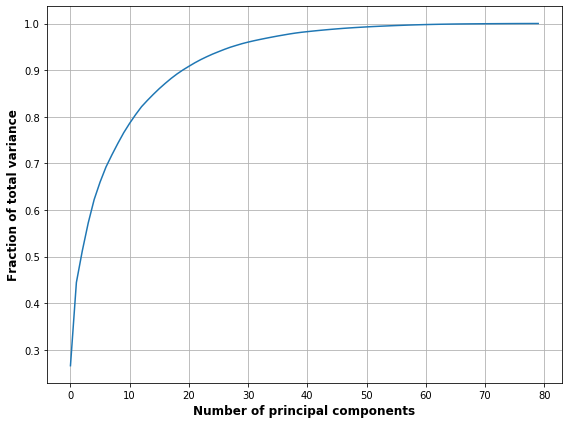

In [9]:
def P1(train_data):

    ### STUDENT START ###
    # the first k principal components we would like to look at more closely
    c = [1, 2, 3, 4, 5, 10, 20, 22, 25, 30, 35, 40, 50, 60, 70, 80]

    # Define the PCA model
    # Note: We do not specify the n_components considering that the question asked for presenting the fraction of 
    #       total variance for all possible numbers of principal components
    pca = PCA(n_components = None)

    # fit the PCA model to the training data
    pca.fit_transform(train_data)

    # all explained variance ratio in the data by the PCA model
    expl_var = pca.explained_variance_ratio_

    # printing out the fraction of total variance in the training data for some of the first k principal components 
    print('Fraction of the total variance in the training data'\
          ' that is explained by the first k principal components for:')
    for k in c:
        print('\tk = {}, would be: {:.4f}'.format(k, expl_var[:k].sum()))
    print('='*100)

    # showing a lineplot of fraction of total variance vs. number of principal components, 
    # for all possible numbers of principal components
    total_var = []
    for i in range(len(expl_var)-1):
        total_var.append(expl_var[:i+1].sum())
    fig, ax = plt.subplots(figsize = (8,6))
    plt.plot(total_var)
    plt.xlabel('Number of principal components', fontsize = 12, fontweight = 'bold')
    plt.ylabel('Fraction of total variance', fontsize = 12, fontweight = 'bold')
    plt.tight_layout()
    plt.grid()
    plt.show()
    ### STUDENT END ###

P1(df1.iloc[:, 2:])

In [10]:
pca = PCA(n_components = 25) 
df_pca = pca.fit_transform(df1.iloc[:,2:])
dfr = df1[df1['l_vs_r'] == "'right'"].iloc[:, 2:]
dfl = df1[df1['l_vs_r'] == "'left'"].iloc[:, 2:]
dfr_pca = pca.fit_transform(dfr)
dfl_pca = pca.fit_transform(dfl)

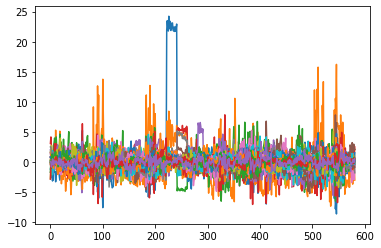

In [11]:
plt.plot(df_pca)

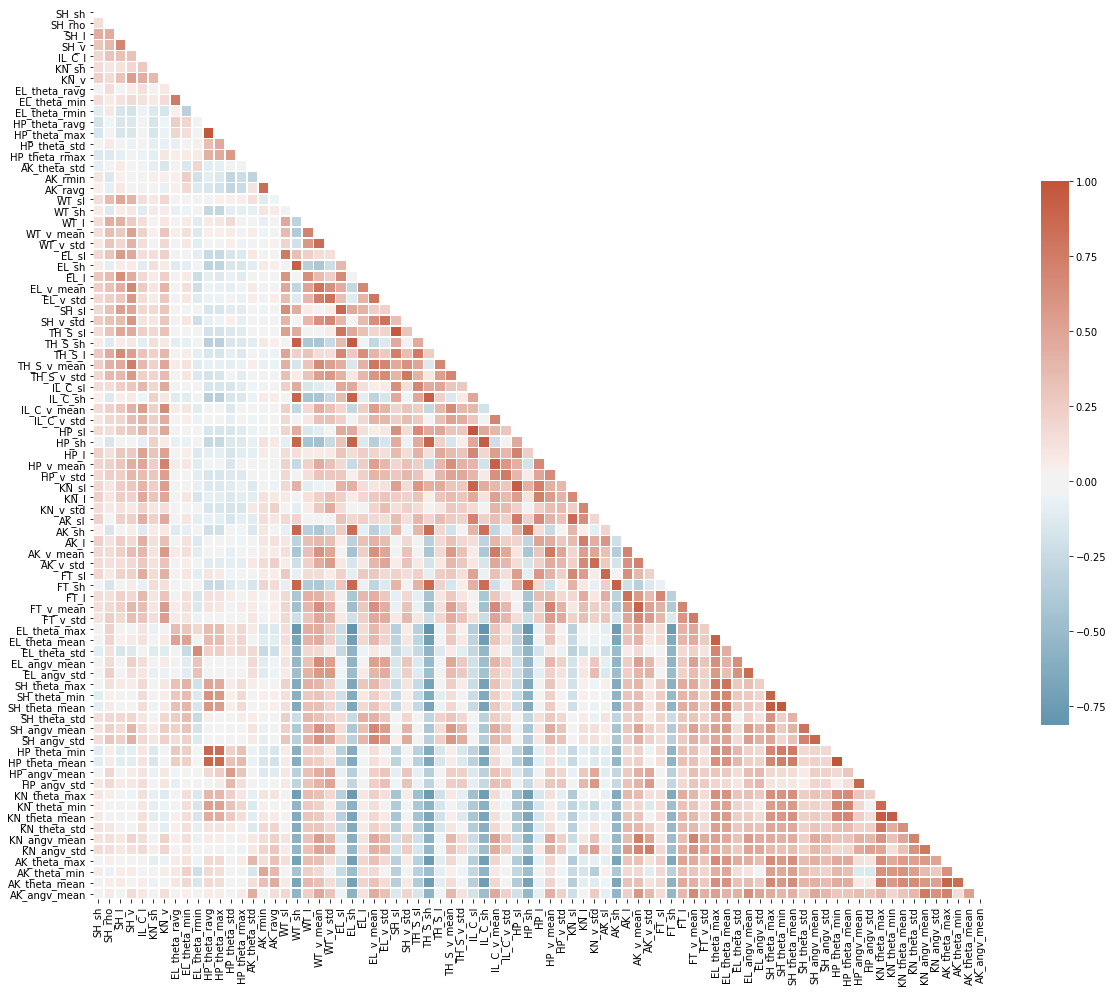

In [12]:
# Compute the correlation matrix
# corr = pd.DataFrame(df_pca).corr()
corr = df1.iloc[:,2:].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
# Create correlation matrix
corr = df1.iloc[:,2:].corr()
corr_matrix = corr.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]

# Drop features 
d = df1.iloc[:,2:]
d1 = d.drop(to_drop, axis=1)
d1

SH_sh    SH_rho      SH_l      SH_v  \
animal_id gentyp age genotype                                           
306       20     13  0        -1.771878 -1.331161 -1.506877  1.798616   
                     0         0.008984 -1.062779 -0.261554 -0.468161   
                     0        -1.137014 -1.063351  0.476510  0.696740   
                     0        -0.309817 -0.913815  0.179144 -0.467518   
                     0        -1.157867 -0.779907  0.940733  0.554341   
...                                 ...       ...       ...       ...   
925       0      4   3         1.022334 -1.118269 -0.497402 -0.199562   
                     3         0.753064 -0.834667  0.582528 -0.125609   
                     3         0.894689 -1.060282 -0.412563 -0.294568   
                     3        -0.119770 -0.610214  0.739216 -0.016579   
                     3         0.011565 -1.072512 -0.748260 -0.510022   

                                 IL_C_l     KN_sh      KN_v  EL_theta_ravg  \
animal_id gentyp age genotype                                                
306       20     13  0         2.677203  1.234328  0.812290      -0.573723   
                     0         0.658104  0.975755  0.502059      -0.163330   
                     0        -0.953628 -1.252761 -0.132228      -0.150267   
                     0        -0.438404 -0.821105 -0.353839      -0.331698   
                     0         0.025152 -1.373166 -0.636915      -0.344752   
...                                 ...       ...       ...            ...   
925       0      4   3        -0.193455 -1.262068 -0.501337      -0.556420   
                     3        -0.965153 -1.768883 -0.720435      -0.874990   
                     3         0.090212  0.768195 -0.325663      -0.921672   
                     3        -0.088629  0.249915  0.229372      -0.841291   
                     3        -0.020540 -0.796543  0.290271      -0.943890   

                               EL_theta_min  EL_theta_rmin  ...  EL_angv_mean  \
animal_id gentyp age genotype                               ...                 
306       20     13  0             0.901238      -3.307500  ...      0.588854   
                     0            -0.350198      -0.548115  ...      0.396039   
                     0             0.014707      -0.076686  ...     -0.200294   
                     0            -0.305664      -0.414198  ...      1.667722   
                     0            -0.273914      -0.994212  ...      0.716878   
...                                     ...            ...  ...           ...   
925       0      4   3             0.160364      -1.863128  ...     -1.024833   
                     3            -0.419521      -0.688151  ...     -0.935425   
                     3            -0.168614      -1.655552  ...     -1.114084   
                     3            -0.461644      -0.648313  ...     -0.838606   
                     3            -0.467367      -0.677661  ...     -0.464349   

                               SH_theta_std  HP_angv_mean  KN_theta_max  \
animal_id gentyp age genotype                                             
306       20     13  0            -0.665847     -0.175616     -0.236546   
                     0            -0.572115     -0.491072     -0.139309   
                     0            -0.373283      0.455374     -0.005650   
                     0             0.163309      0.266092      0.340107   
                     0             0.268843      1.497906      0.249122   
...                                     ...           ...           ...   
925       0      4   3            -0.471218     -0.272760      1.370882   
                     3            -0.374732     -0.299024      1.111257   
                     3            -0.456948      0.011102      1.111257   
                     3            -0.880798      0.450264      1.237487   
                     3            -0.753203     -0.002955      1.237487   

                               KN_theta

In [14]:
df1

test_number   l_vs_r     SH_sh    SH_rho  \
animal_id gentyp age genotype                                             
306       20     13  0                   1   'left' -1.771878 -1.331161   
                     0                   2   'left'  0.008984 -1.062779   
                     0                   3   'left' -1.137014 -1.063351   
                     0                   1  'right' -0.309817 -0.913815   
                     0                   2  'right' -1.157867 -0.779907   
...                                    ...      ...       ...       ...   
925       0      4   3                   6  'right'  1.022334 -1.118269   
                     3                   7  'right'  0.753064 -0.834667   
                     3                   8  'right'  0.894689 -1.060282   
                     3                   9  'right' -0.119770 -0.610214   
                     3                  10  'right'  0.011565 -1.072512   

                                   SH_l      SH_v    IL_C_l     KN_sh  \
animal_id gentyp age genotype                                           
306       20     13  0        -1.506877  1.798616  2.677203  1.234328   
                     0        -0.261554 -0.468161  0.658104  0.975755   
                     0         0.476510  0.696740 -0.953628 -1.252761   
                     0         0.179144 -0.467518 -0.438404 -0.821105   
                     0         0.940733  0.554341  0.025152 -1.373166   
...                                 ...       ...       ...       ...   
925       0      4   3        -0.497402 -0.199562 -0.193455 -1.262068   
                     3         0.582528 -0.125609 -0.965153 -1.768883   
                     3        -0.412563 -0.294568  0.090212  0.768195   
                     3         0.739216 -0.016579 -0.088629  0.249915   
                     3        -0.748260 -0.510022 -0.020540 -0.796543   

                                   KN_v  EL_theta_ravg  ...  KN_theta_max  \
animal_id gentyp age genotype                           ...                 
306       20     13  0         0.812290      -0.573723  ...     -0.236546   
                     0         0.502059      -0.163330  ...     -0.139309   
                     0        -0.132228      -0.150267  ...     -0.005650   
                     0        -0.353839      -0.331698  ...      0.340107   
                     0        -0.636915      -0.344752  ...      0.249122   
...                                 ...            ...  ...           ...   
925       0      4   3        -0.501337      -0.556420  ...      1.370882   
                     3        -0.720435      -0.874990  ...      1.111257   
                     3        -0.325663      -0.921672  ...      1.111257   
                     3         0.229372      -0.841291  ...      1.237487   
                     3         0.290271      -0.943890  ...      1.237487   

                               KN_theta_min  KN_theta_mean  KN_theta_std  \
animal_id gentyp age genotype                                              
306       20     13  0             0.248598      -0.050575     -0.456095   
                     0             0.071121       0.083403     -0.216050   
                     0            -0.045425      -0.040466     -0.154358   
                     0             0.821132       0.588994      0.045149   
                     0             0.896909       0.752522     -0.609804   
...                                     ...            ...           ...   
925       0      4   3             1.409776       1.476620      1.099800   
                     3             1.479769       1.402393     -0.148717   
                     3             1.658184       1.406899     -0.075193   
                     3             1.758196       1.573711      0.199209   
                     3             1.891698       1.685901      0.260862   

                               KN_angv_mean  KN_angv_std  AK_theta_max  \
animal_id gentyp age genotype           

In [15]:
# scikit-learn bootstrap

d3 = resample(d1, replace=True, n_samples=50, random_state=42)
pd.concat([d1,d3], axis = 0).sort_index(level = 0).shape

(632, 45)

## Classification: gebotype

In [41]:
# One-Leave_Out Cross Validation 

def loocv(data, model, p = 1, scaler = MinMaxScaler(), \
          bootstrap = 'y', bstp_n = 100, mu = 0.0, sigma = 0.4, \
          with_pca = 'y', averaging = 'y', metric = accuracy_score):
    
    '''p-leave-out cross validation function'''
    
    n_subj = len(data.index.get_level_values(level = 0).unique())
  
    train_acc = [] #{}
    test_acc =  [] #{}
    test_bacc = [] #{}
    test_f1 = []
    test_fnr = []

    for i in range(n_subj-p):

        train = data.loc[data.index.levels[0][list(range(0,i))+list(range(i+p, n_subj))].tolist()]
        test  = data.loc[data.index.levels[0][i:i+p].tolist()]

        #  Bootstrapping training data 
        data_bt = copy.deepcopy(data)
        if bootstrap.lower() == 'y':
            train_bt = resample(train, replace=True, n_samples = bstp_n, random_state=1234)
            data_bt = pd.concat([data,train_bt], axis = 0).sort_index(level = 0)
            train = pd.concat([train,train_bt], axis = 0).sort_index(level = 0)
        
        # Train and test input (X)
        X_train = np.array(train)
        X_tr = scaler.fit_transform(X_train)
        X_test = np.array(test)
        X_ts = scaler.transform(X_test)

        # Add Gaussian noise to the training data
        for j in range(X_tr.shape[1]):
            noise = np.random.normal(mu, sigma)
            X_tr[:,j] += noise

        # Train and test output (Y)
        Y_tr_g = np.array(data_bt.index.get_level_values(level  =1))[X_ts.shape[0]:]
        Y_ts_g = np.array(data_bt.index.get_level_values(level  =1))[:X_ts.shape[0]]


        Y_tr = Y_tr_g 
        Y_ts = Y_ts_g 

        ml = model
        
#         PCA
        pca = PCA(n_components = 10) 
        pca.fit(X_tr)

        if with_pca.lower() == 'y':
            mt = ml.fit(pca.transform(X_tr),Y_tr)
            Y_pr_tr = mt.predict(pca.transform(X_tr))
            if averaging.lower() == 'y':
                Y_pr = mt.predict(pca.transform(X_ts))
            else:
                Y_pr = mt.predict(np.mean(pca.transform(X_ts), axis = 0).reshape(1,-1))
        else:
            mt =  ml.fit(X_tr,Y_tr)
            Y_pr_tr = mt.predict(X_tr)
            if averaging.lower() == 'y':
                Y_pr = mt.predict(np.mean(X_ts, axis = 0).reshape(1,-1))
            else:
                Y_pr = mt.predict(X_ts)
                
        train_acc.append(metric(Y_pr_tr,Y_tr))
        if averaging.lower() == 'y':
            test_acc.append(metric(Y_pr,Y_ts[0].reshape(1,-1)))
            test_bacc.append(balanced_accuracy_score(Y_pr,Y_ts[0].reshape(1,-1)))
            test_f1.append(f1_score(Y_pr,Y_ts[0].reshape(1,-1)))
            test_fnr.append(1-recall_score(Y_pr,Y_ts[0].reshape(1,-1)))
        else:
            test_acc.append(metric(Y_pr,Y_ts))
            test_bacc.append(balanced_accuracy_score(Y_pr,Y_ts))
            test_f1.append(f1_score(Y_pr,Y_ts))
            test_fnr.append(1-recall_score(Y_pr,Y_ts))
        if i == 5:
            y_pred, y_pred_proba, accuracy, bac, feature_imp, mfi = J20.RandomForest(rf, X_tr, X_ts, Y_tr, Y_ts,list(data.columns))
            
    return train_acc, test_acc, test_bacc, test_f1, test_fnr , y_pred, y_pred_proba, accuracy, bac, feature_imp, mfi

In [135]:
# One-Leave_Out Cross Validation 

def lmcnemar(data, models, scaler = MinMaxScaler()):
    
    '''leave-one-out cross validation function'''
    p = 1 
    n_subj = len(data.index.get_level_values(level = 0).unique())

#     yes_no = []
#     no_yes = []
#     for i in range(n_subj-p):

#     train = data.loc[data.index.levels[0][list(range(0,i))+list(range(i+p, n_subj))].tolist()]
#     test  = data.loc[data.index.levels[0][i:i+p].tolist()]
    train = data
    # Train and test input (X)
    X_train = np.array(train)
    X_tr = scaler.fit_transform(X_train)
#     X_test = np.array(test)
#     X_ts = scaler.transform(X_test)


    # Train and test output (Y)
    Y_tr_g = np.array(data.index.get_level_values(level  =1))#[X_ts.shape[0]:]
#     Y_ts_g = np.array(data.index.get_level_values(level  =1))[:X_ts.shape[0]]


    Y_tr = Y_tr_g 
#     Y_ts = Y_ts_g 

    # model 1 fit
    mt1 = models[0].fit(X_tr,Y_tr)
    Y_pr_tr1 = mt1.predict(X_tr)
#     Y_pr1 = mt1.predict(X_ts)

    # model 2 fit
    mt2 = models[1].fit(X_tr,Y_tr)
    Y_pr_tr2 = mt2.predict(X_tr)
#     Y_pr2 = mt2.predict(X_ts)

    # compare two models
    m = pd.DataFrame([Y_tr, Y_pr_tr1, Y_pr_tr2]).T
    '''Yes/No is the count of test instances that Classifier1 got correct and Classifier2 got incorrect, 
    and No/Yes is the count of test instances that Classifier1 got incorrect and Classifier2 got correct.'''

#         print(m[(m.iloc[:,0] == m.iloc[:,1]) & (m.iloc[:,0] != m.iloc[:,2])].shape)
    yy = m[(m.iloc[:,0] == m.iloc[:,1]) & (m.iloc[:,0] == m.iloc[:,2])]
    yn = m[(m.iloc[:,0] == m.iloc[:,1]) & (m.iloc[:,0] != m.iloc[:,2])]
    ny = m[(m.iloc[:,0] == m.iloc[:,2]) & (m.iloc[:,0] != m.iloc[:,1])] 
    nn = m[(m.iloc[:,0] != m.iloc[:,2]) & (m.iloc[:,0] != m.iloc[:,1])] 
    conting_tabl = [[yy.count()[0], yn.count()[0]], [ny.count()[0], nn.count()[0]]]

#     yes_no.append(yn.count())
#     no_yes.append(ny.count())
#     del m

       
    return m, conting_tabl

In [177]:
rf = RandomForestClassifier(
                            n_estimators=500,
                            criterion='entropy',
                            max_depth=c,
                            min_samples_split=0.00001,
                            min_samples_leaf=3,
                            min_weight_fraction_leaf=0.0,
                            max_features='log2',
                            min_impurity_decrease=0.0,
                            bootstrap=True,
                            oob_score=True,
                            verbose=0,
                            warm_start=True,
                            ccp_alpha=0.0,
                        )

svc = svm.SVC(C = 0.8) 

In [181]:
m, ct = lmcnemar(df_13m, [rf, svc])

In [182]:
ct

[[290, 6], [4, 2]]

In [183]:
result = mcnemar(ct, exact=False)
# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
	print('Same proportions of errors (fail to reject H0)')
else:
	print('Different proportions of errors (reject H0)')

statistic=0.100, p-value=0.752
Same proportions of errors (fail to reject H0)


###  Split data into two age groups (4m and 13m) and further down to unilateral (right vs left)

In [42]:
dft = df1.reset_index()
le = LabelEncoder()
dft['gentyp'] = le.fit_transform(dft['gentyp'])

# split into 4 and 13 months
df_4m = dft[dft.age==4].set_index(['animal_id', 'gentyp', 'age','genotype', 'l_vs_r']).iloc[:, 1:]
df_13m = dft[dft.age==13].set_index(['animal_id', 'gentyp', 'age','genotype', 'l_vs_r']).iloc[:, 1:]

# split each into right and left
df_4m_r = df_4m[df_4m.index.get_level_values(level = 4) == "'right'"]
df_4m_l = df_4m[df_4m.index.get_level_values(level = 4) == "'left'"]

df_13m_r = df_13m[df_13m.index.get_level_values(level = 4) == "'right'"]
df_13m_l = df_13m[df_13m.index.get_level_values(level = 4) == "'left'"]

In [43]:
df_4m

SH_sh    SH_rho      SH_l      SH_v  \
animal_id gentyp age genotype l_vs_r                                            
743       1      4   2        'left'  -1.905644 -0.500354 -1.336112 -1.034122   
                              'left'  -1.526422 -0.055087 -1.202342 -1.036183   
                              'left'  -1.524803  0.440683 -0.842055 -0.915768   
                              'left'  -1.490400  0.020316 -0.714984 -0.874619   
                              'left'  -1.408592  0.114073 -0.327717 -0.811818   
...                                         ...       ...       ...       ...   
925       0      4   3        'right'  1.022334 -1.118269 -0.497402 -0.199562   
                              'right'  0.753064 -0.834667  0.582528 -0.125609   
                              'right'  0.894689 -1.060282 -0.412563 -0.294568   
                              'right' -0.119770 -0.610214  0.739216 -0.016579   
                              'right'  0.011565 -1.072512 -0.748260 -0.510022   

                                         IL_C_l     KN_sh      KN_v  \
animal_id gentyp age genotype l_vs_r                                  
743       1      4   2        'left'  -0.869334  0.163122 -0.858501   
                              'left'  -1.032994 -0.189320 -0.236578   
                              'left'  -0.485529 -0.945232 -0.654381   
                              'left'  -0.573867 -0.605701 -0.501972   
                              'left'  -0.355190 -0.736017 -0.174235   
...                                         ...       ...       ...   
925       0      4   3        'right' -0.193455 -1.262068 -0.501337   
                              'right' -0.965153 -1.768883 -0.720435   
                              'right'  0.090212  0.768195 -0.325663   
                              'right' -0.088629  0.249915  0.229372   
                              'right' -0.020540 -0.796543  0.290271   

                                       EL_theta_ravg  EL_theta_min  \
animal_id gentyp age genotype l_vs_r                                 
743       1      4   2        'left'       -1.216133     -1.791329   
                              'left'       -1.050824     -1.252534   
                              'left'       -1.177321     -1.615914   
                              'left'       -0.868853     -1.526521   
                              'left'       -1.292510     -1.471432   
...                                              ...           ...   
925       0      4   3        'right'      -0.556420      0.160364   
                              'right'      -0.874990     -0.419521   
                              'right'      -0.921672     -0.168614   
                              'right'      -0.841291     -0.461644   
                              'right'      -0.943890     -0.467367   

                                       EL_theta_rmin  ...  KN_theta_max  \
animal_id gentyp age genotype l_vs_r                  ...                 
743       1      4   2        'left'        1.321031  ...     -0.488910   
                              'left'        1.145254  ...     -0.231529   
                              'left'        0.957097  ...     -0.286109   
                              'left'        1.390931  ...     -0.205641   
                              'left'        0.944913  ...     -0.212419   
...                                              ...  ...           ...   
925       0      4   3        'right'      -1.863128  ...      1.370882   
                              'right'      -0.688151  ...      1.111257   
                              'right'      -1.655552  ...      1.111257   
                              'right'      -0.648313  ...      1.237487   
                              'right'      -0.677661  ...      1.237487   

                                       KN_theta_min  KN_theta_mean  \
animal_id gentyp age genotype l_vs_r                                 
743       1      4   2        'left' 

## 4 mon

Accuracy: 1.0
Balanced Accuracy: 1.0


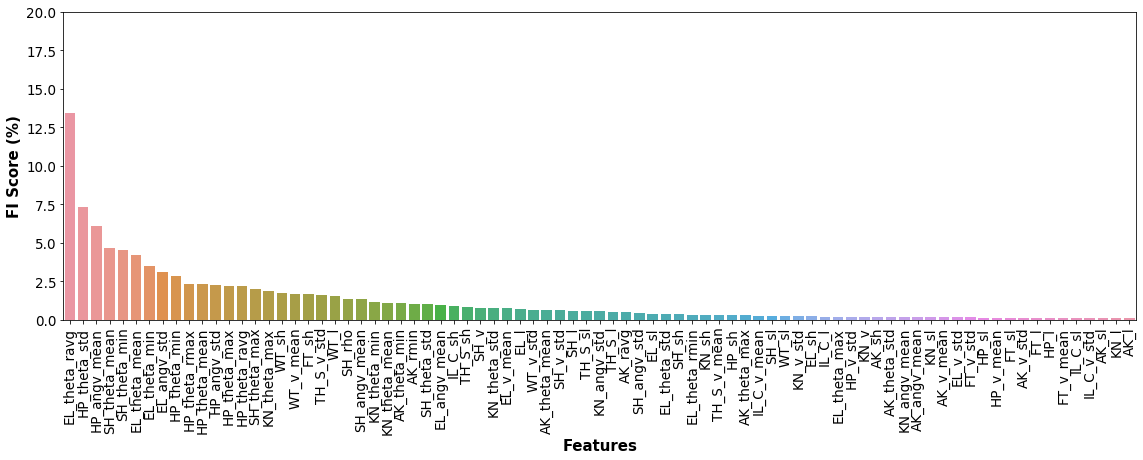

Train acc: 73.87573964497042 +/- 3.7934464847314198 
Test acc: 72.3076923076923 +/- 10.691108584302247 
Test bacc: 76.92307692307693 +/- 9.155677472490835 
Test F1: 76.9723865877712 +/- 9.464758614863937 
Test FNR: 7.6923076923076925 +/- 7.6923076923076925 


In [44]:
# Run the model for multiple hyperparameter for regularization

train_acc = []
train_acc_sem = []

test_acc = []
test_acc_sem = []

test_bacc = []
test_bacc_sem = []

test_f1 = []
test_f1_sem = []

test_fnr = []
test_fnr_sem = []

# Parameter set
# Random Forest max depth (md)
# md = [ 0.65, 0.75, 0.8, 0.9, 1] # 13m
md = [1, 2, 3, 3.5, 4, 4.5, 5, 7, 10]  #4m

for c in [5]:#md:
    # define model
    rf = RandomForestClassifier(n_estimators=500,
                                criterion='gini',
                                max_depth=c,
                                min_samples_split=0.00001,
                                min_samples_leaf=7,
                                min_weight_fraction_leaf=0.0,
                                max_features='log2',
                                min_impurity_decrease=0.0,
                                bootstrap=True,
                                oob_score=True,
                                verbose=0,
                                warm_start=True,
                                ccp_alpha=0.0,
                                )
    # Run simulation (cross validation)
    tr_acc, ts_acc, ts_bacc, ts_f1, ts_fnr, \
    y_pred, y_pred_proba, accuracy, bac, feature_imp, mfi = loocv(df_4m_l, rf, p = 1, scaler = MinMaxScaler(), \
                          bootstrap = 'y', bstp_n =650, mu=0.00,  sigma = 0.35, \
                          with_pca = 'n', averaging = 'n', metric = accuracy_score)
    
    
    train_acc.append(np.mean(tr_acc)*100)
    train_acc_sem.append(sem(tr_acc)*100)
    
    test_acc.append(np.mean(ts_acc)*100)
    test_acc_sem.append(sem(ts_acc)*100)
    
    test_bacc.append(np.mean(ts_bacc)*100)
    test_bacc_sem.append(sem(ts_bacc)*100)
    
    test_f1.append(np.mean(ts_f1)*100)
    test_f1_sem.append(sem(ts_f1)*100)
    
    test_fnr.append(np.mean(ts_fnr)*100)
    test_fnr_sem.append(sem(ts_fnr)*100)

print('Train acc: {} +/- {} '.format(train_acc[0],train_acc_sem[0]))
print('Test acc: {} +/- {} '.format(test_acc[0],test_acc_sem[0]))
print('Test bacc: {} +/- {} '.format(test_bacc[0],test_bacc_sem[0]))
print('Test F1: {} +/- {} '.format(test_f1[0],test_f1_sem[0]))
print('Test FNR: {} +/- {} '.format(test_fnr[0],test_fnr_sem[0]))

In [169]:
FI_4m_l = copy.deepcopy(feature_imp_4m_l)

## 13 mon

Accuracy: 0.9
Balanced Accuracy: 0.9


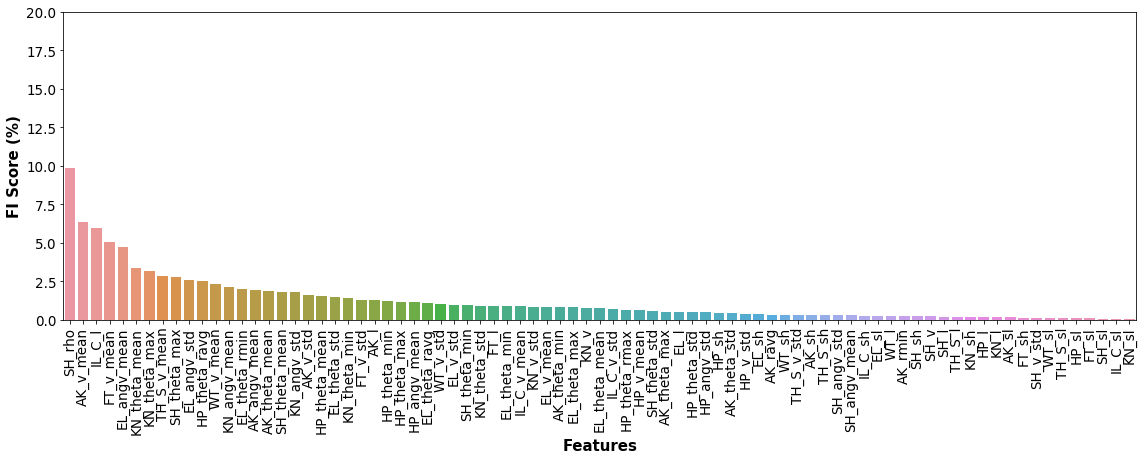

Train acc: 90.84525286441644 +/- 1.985673993589105 
Test acc: 99.0 +/- 0.7237468644557457 
Test bacc: 93.33333333333333 +/- 4.5425676257949785 
Test F1: 99.47818263607738 +/- 0.37916608099253973 
Test FNR: 0.0 +/- 0.0 


In [45]:
# Run the model for multiple hyperparameter for regularization

train_acc = []
train_acc_sem = []

test_acc = []
test_acc_sem = []

test_bacc = []
test_bacc_sem = []

test_f1 = []
test_f1_sem = []

test_fnr = []
test_fnr_sem = []


# Parameter set
# Random Forest max depth (md)
md = [1, 2, 2.5, 3, 4, 5, 6] # 13m
# md = [1, 2, 3, 3.5, 4, 4.5, 5, 7, 10]  #4m

for c in [4]:#md:
    # define model
    rf = RandomForestClassifier(
                                n_estimators=500,
                                criterion='entropy',
                                max_depth=c,
                                min_samples_split=0.00001,
                                min_samples_leaf=3,
                                min_weight_fraction_leaf=0.0,
                                max_features='log2',
                                min_impurity_decrease=0.0,
                                bootstrap=True,
                                oob_score=True,
                                verbose=0,
                                warm_start=True,
                                ccp_alpha=0.0,
                            )

    # Run simulation (cross validation)
    tr_acc, ts_acc, ts_bacc, ts_f1, ts_fnr, y_pred, y_pred_proba, \
    accuracy, bac, feature_imp_13m, mfi = loocv(df_13m, rf, p = 1, scaler = MinMaxScaler(), \
                          bootstrap = 'y', bstp_n =650, mu=0.35,  sigma = 0.0, \
                          with_pca = 'n', averaging = 'n')

    train_acc.append(np.mean(tr_acc)*100)
    train_acc_sem.append(sem(tr_acc)*100)
    
    test_acc.append(np.mean(ts_acc)*100)
    test_acc_sem.append(sem(ts_acc)*100)
    
    test_bacc.append(np.mean(ts_bacc)*100)
    test_bacc_sem.append(sem(ts_bacc)*100)
    
    test_f1.append(np.mean(ts_f1)*100)
    test_f1_sem.append(sem(ts_f1)*100)
    
    test_fnr.append(np.mean(ts_fnr)*100)
    test_fnr_sem.append(sem(ts_fnr)*100)

print('Train acc: {} +/- {} '.format(train_acc[0],train_acc_sem[0]))
print('Test acc: {} +/- {} '.format(test_acc[0],test_acc_sem[0]))
print('Test bacc: {} +/- {} '.format(test_bacc[0],test_bacc_sem[0]))
print('Test F1: {} +/- {} '.format(test_f1[0],test_f1_sem[0]))
print('Test FNR: {} +/- {} '.format(test_fnr[0],test_fnr_sem[0]))


# plt.savefig('13mon_bl')

# # save as TIFF
# png1 = BytesIO()
# plt.savefig(png1, format='png')
# png2 = Image.open(png1)

# png2.save('13mon_bl.tiff')
# png1.close()

In [182]:
FI_13m = copy.deepcopy(feature_imp_13m)

In [212]:
FI_4m_bl

SH_s            0.003529
SH_rh           0.015753
SH_             0.002829
SH_.1           0.007394
IL_C_           0.001221
                  ...   
AK_theta_ma     0.004211
AK_theta_mi     0.014237
AK_theta_mea    0.006059
AK_angv_mea     0.003245
AK_angv_st      0.007862
Length: 82, dtype: float64

In [213]:
fi_4m = pd.DataFrame([FI_4m_bl, FI_4m_r, FI_4m_l]).T
fi_4m = fi_4m.rename(columns = {0: '4m', 1: '4m_r', 2: '4m_l'})

In [203]:
fi_13m = pd.DataFrame([FI_13m, FI_13_r, FI_13_l]).T

In [205]:
fi_13m = fi_13m.rename(columns = {0: '13m', 1: '13m_r', 2: '13m_l'})

In [214]:
fi_4m

,4m,4m_r,4m_l
SH_s,0.003529,0.003149,0.006626
SH_rh,0.015753,0.006175,0.011365
SH_,0.002829,0.003262,0.008268
SH_.1,0.007394,0.008699,0.006084
IL_C_,0.001221,0.003873,0.002317
...,...,...,...
AK_theta_ma,0.004211,0.004426,0.002323
AK_theta_mi,0.014237,0.011949,0.009674
AK_theta_mea,0.006059,0.008619,0.006350
AK_angv_mea,0.003245,0.002762,0.002144


In [29]:
# param = md
# plt.plot(param, train_acc,'r', label = 'Train')
# plt.plot(param, test_acc, 'b', label = 'Test')
# plt.ylabel('Accuracy')
# plt.xlabel('C = 1/lambda')
# plt.legend()
# plt.show()

In [89]:
print('Train acc: ', train_acc)
print('Test acc: ', test_acc)

Train acc:  [0.7535353367873289]
Test acc:  [0.8461538461538461]


22


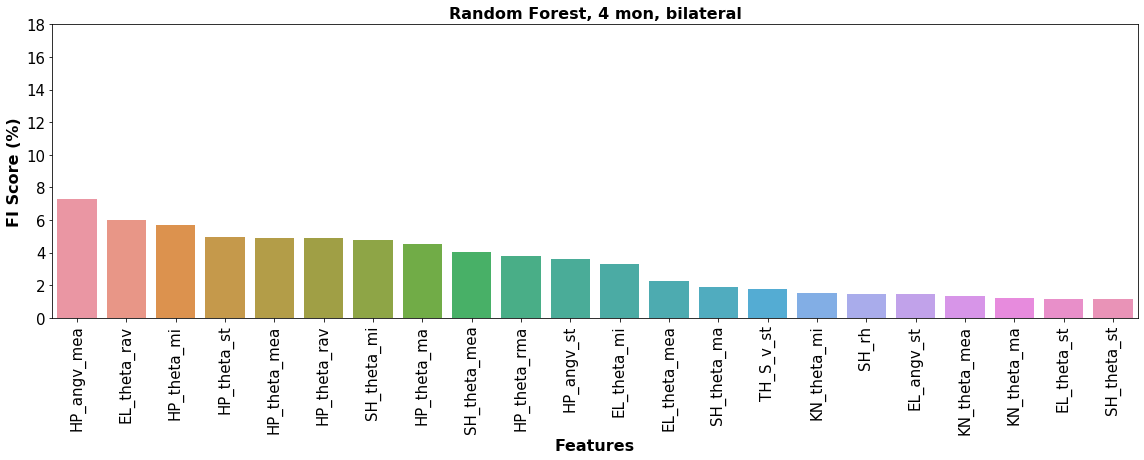

In [100]:
#     Visualizing features based on their importance

FI_select = feature_imp[feature_imp >= 0.011359]
print(len(FI_select))
plt.figure(figsize=(16,6.5))
sns.barplot(y=FI_select.sort_values(ascending=False)*100, x = FI_select.sort_values(ascending=False).index)
plt.xlabel('Features', fontsize = 16, fontweight='bold')
plt.ylabel('FI Score (%)', fontsize = 16, fontweight='bold')
plt.ylim([0,18])
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.title('Random Forest, 4 mon, bilateral', fontsize = 16, fontweight='bold')
plt.tight_layout()
plt.savefig('Fig3a')

# save as TIFF
png1 = BytesIO()
plt.savefig(png1, format='png')
png2 = Image.open(png1)

png2.save('Fig3a.tiff')
png1.close()

## McNemar’s Test to Compare Machine Learning Classifiers

### Replotting feature importances

In [2]:
FIs = pd.read_csv('FI_updated.csv')

In [3]:
fi = FIs.drop('Unnamed: 1', axis = 1).rename(columns = {'Unnamed: 0': 'features'}).set_index('features')

In [4]:
fi.max(axis = 0)

4m_BL           6.278724
13m_BL          9.170695
4m_R            6.186191
13m_R           6.635397
4m_L           12.707634
13m_L          16.574247
perm_13m_BL     4.506438
perm_4m_BL      3.580247
dtype: float64

82


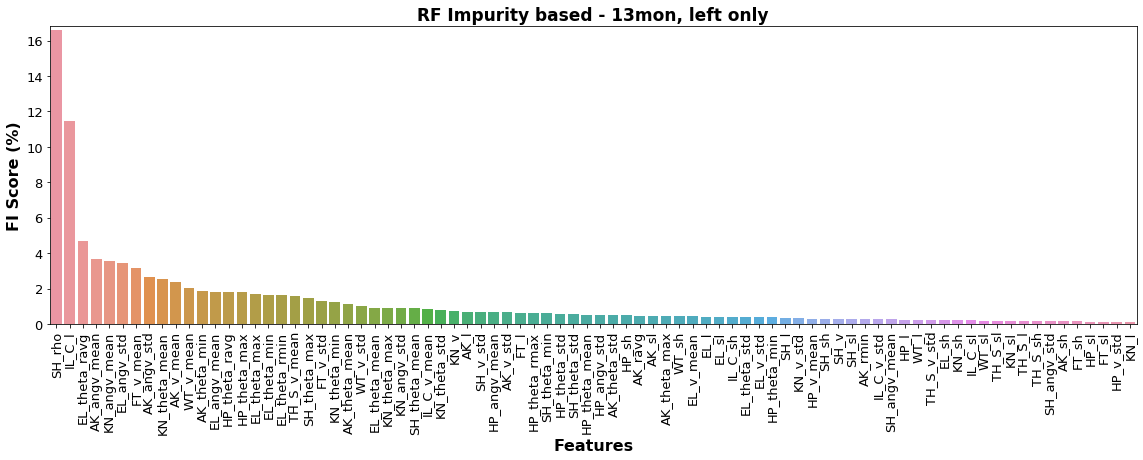

In [15]:
# redraw FI features

feature_imp = fi.loc[:, '13m_L']

FI_select = feature_imp #[feature_imp >= 1.4]
# FI_select = feature_imp
print(len(FI_select))
plt.figure(figsize=(16,6.5))
sns.barplot(y=FI_select.sort_values(ascending=False), x = FI_select.sort_values(ascending=False).index)
plt.xlabel('Features', fontsize = 16, fontweight='bold')
plt.ylabel('FI Score (%)', fontsize = 16, fontweight='bold')
plt.ylim([0,16.8])
plt.xticks(fontsize = 13, rotation = 90)
plt.yticks(fontsize = 13)
plt.title('RF Impurity based - 13mon, left only', fontsize = 17, fontweight='bold')
# plt.legend(['4mon'], fontsize = 17)
plt.tight_layout()

# plotting
plt.savefig('FigS3f')

# save as TIFF
png1 = BytesIO()
plt.savefig(png1, format='png')
png2 = Image.open(png1)

png2.save('FigS3ef.tiff')
png1.close()

## Comparing feature importances 

> Compare Feature Impotance between Right only (R), Left only (L), and Bilateral (BL)

In [2032]:
fi.columns

Index(['4m_BL', '13m_BL', '4m_R', '13m_R', '4m_L', '13m_L', 'perm_13m_BL',
       'perm_4m_BL'],
      dtype='object')

In [2122]:
n = 10
perm_13m = set(fi.sort_values(by = 'perm_13m_BL', ascending = False).iloc[:n,6].index)
imp_13m = set(fi.sort_values(by = '13m_BL', ascending = False).iloc[:n,1].index)
perm_4m = set(fi.sort_values(by = 'perm_4m_BL', ascending = False).iloc[:n,7].index)
imp_4m = set(fi.sort_values(by = '4m_BL', ascending = False).iloc[:n,0].index)

In [2123]:
perm_4m.intersection(imp_4m)

{'HP_angv_mean',
 'HP_angv_std',
 'HP_theta_ravg',
 'SH_theta_mean',
 'SH_theta_min'}

In [2124]:
perm_13m.intersection(imp_13m)

{'AK_v_mean', 'FT_v_mean', 'HP_theta_ravg', 'IL_C_l', 'SH_rho'}

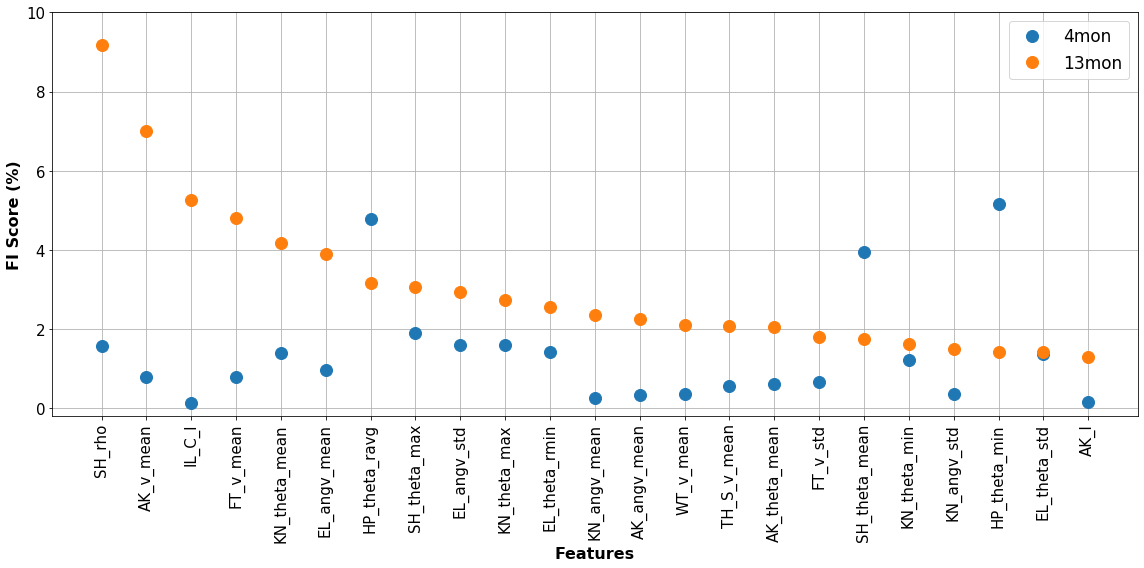

In [2054]:
plt.figure(figsize=(16,8))
plt.plot(fi.sort_values(by = '13m_BL', ascending = False).iloc[:23,[0,1]], marker = 'o', markersize = 12, linestyle='None')
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.xlabel('Features', fontsize = 16, fontweight = 'bold')
plt.ylabel('FI Score (%)', fontsize = 16, fontweight = 'bold')
plt.ylim([-0.2, 10])
# plt.legend(['4m-BL','13m-BL', '4m-R','13m-R', '4m-L','13m-L'], fontsize = 14)
plt.legend(['4mon', '13mon'], fontsize = 17)
plt.grid()
plt.tight_layout()

plt.savefig('Fig2a')

# save as TIFF
png1 = BytesIO()
plt.savefig(png1, format='png')
png2 = Image.open(png1)

png2.save('Fig2a.tiff')
png1.close()

In [240]:
f.to_csv("FI.csv")

In [161]:
# k-nearest neighbors
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='euclidean')
#############################################################################################
# Radius neighbors
rn = RadiusNeighborsClassifier(radius=20, weights= 'uniform', algorithm = "auto" , p = 2, metric = 'euclidean')
#############################################################################################
# Logistic regression
lr = LogisticRegression(C = .0001, penalty='l1', tol=0.0001, solver='saga')
#############################################################################################

ovo = OneVsOneClassifier(svm.SVC(C = .04, kernel='rbf', degree=15, shrinking=True,  \
                                  probability = True, tol = 1e-5, break_ties= True))     # tuned for classifying based on genotype
svc = svm.SVC(C = 0.0385) 
#############################################################################################
nca = NeighborhoodComponentsAnalysis(
    n_components=None,
    max_iter=1000,
    tol=1e-05,
    random_state=84)
#############################################################################################
# Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    criterion='gini',
    max_depth=1,
    min_samples_split=0.0001,
    min_samples_leaf=3,
    min_weight_fraction_leaf=0.0,
    max_features='log2',
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=True,
    verbose=0,
    warm_start=True,
    ccp_alpha=0.0,
)
#############################################################################################
# Gradient Boosting
gb = GradientBoostingClassifier(
    loss='deviance',
    learning_rate=0.001,
    n_estimators=100)

#############################################################################################
# Multilayer perceptron
mlp = MLPClassifier(
                hidden_layer_sizes=(500,),
                activation='relu',
                solver='adam',
                alpha=0.001,
                batch_size='auto',
                learning_rate='constant',
                learning_rate_init=0.001,
                power_t=0.8,
                max_iter=4000,
                shuffle=True,
                random_state=None,
                tol=0.0001,
                verbose=False,
                warm_start=False,
                momentum=0.9,
                nesterovs_momentum=True,
                early_stopping=True,
                validation_fraction=0.2,
                beta_1=0.9,
                beta_2=0.999,
                epsilon=1e-08,
                n_iter_no_change=5,
                max_fun=15000,
            )
#############################################################################################
# Stacking classifier
estimators1 = [ ('rf', rf), ('knn', knn)]
estimators2 = [ ('rf', rf), ('gb', gb)]
estimators_rf_svc = [ ('rf', rf), ('svc', ovo)]

st = StackingClassifier(estimators=estimators_rf_svc)
#############################################################################################

# Passive aggressive classifier
pa = PassiveAggressiveClassifier(C=0.0001, fit_intercept=True, max_iter=10000, tol=0.0001, \
                                 early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, \
                                 shuffle=True, verbose=0, loss='hinge')
#############################################################################################
# Output Code Classifier
occ = OutputCodeClassifier(
    estimator=ovo,  code_size=2,
    random_state=42)

#############################################################################################
# Bernoulli NB
nb = BernoulliNB()

# ovo = OneVsOneClassifier(svm.SVC(C = c, kernel='rbf', degree=15, shrinking=True,  \
#                                  probability = True, tol = 1e-5, break_ties= True))   


# lr = LogisticRegression(C = c, penalty='l2', tol=1e-6, solver='saga') 
# cc_l1 = [0.01, 0.025, 0.034, 0.035, 0.037, 0.038, 0.045, 0.08, 0.5]   # with L1  reg
# cc_l2 = [0.0001, 0.0005, 0.001, 0.002,  0.0025, 0.003, 0.004, 0.005, 0.01, 0.02, 0.1]   # with L2 reg
# cs = [0.5, 1, 1.5, 2, 2.5]

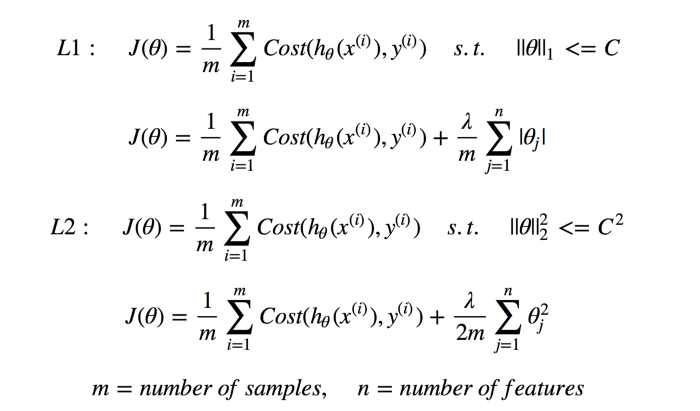

## Regression model:  Drag step and max speed data

In [783]:
del df_ml, df_ds

In [784]:
df_ds = pd.read_excel('20190725 J20 model full raw feature set left and right REVISED 2019.xlsx','Summary sheet')
df_ds.rename(columns = {'genotype':'gentyp'}, inplace = True)

In [785]:
df_ds['Drag_step_number_(out_of_10)'].round(0).value_counts()

1.0     124
0.0      76
6.0      40
3.0      39
2.0      24
4.0      10
10.0      9
5.0       8
7.0       7
9.0       2
8.0       2
Name: Drag_step_number_(out_of_10), dtype: int64

In [793]:
df_ds['drag_step'] = df_ds['Drag_step_number_(out_of_10)'].groupby([df_ds.Animal_ID, df_ds['L_vs_R']]).transform(lambda x: x.fillna(x.mean()))

In [794]:
df_ds['Max_speed_filledNAN'] = df_ds.Max_speed.fillna(method = 'ffill') 

In [795]:
df_ds.Max_speed.value_counts()

9.0     92
21.0    57
18.0    57
12.0    27
15.0    27
10.0    20
24.0    14
20.0    10
14.0    10
17.0    10
22.0    10
6.0      6
27.0     1
Name: Max_speed, dtype: int64

In [796]:
df_ds['Max_speed_filledNAN'].value_counts()

9.0     193
18.0    106
21.0     92
12.0     62
15.0     41
24.0     21
10.0     20
20.0     10
14.0     10
17.0     10
22.0     10
6.0       6
27.0      1
Name: Max_speed_filledNAN, dtype: int64

In [797]:
df_ds.drag_step.value_counts()

0.666667     88
0.000000     81
0.333333     65
1.000000     61
6.333333     27
6.000000     27
3.000000     26
5.000000     22
2.000000     21
5.333333     21
1.333333     17
4.000000     15
4.333333     14
7.000000     14
3.666667     12
2.666667     10
3.333333     10
2.333333     10
9.000000      9
10.000000     9
5.666667      7
1.666667      7
7.333333      7
8.000000      2
Name: drag_step, dtype: int64

In [798]:
df_ds['Drag_step_number_(out_of_10)'].value_counts()

0.666667     60
1.000000     54
0.000000     46
0.333333     30
6.333333     20
6.000000     20
3.000000     19
2.000000     14
4.000000     10
1.333333     10
2.333333     10
2.666667     10
3.333333     10
10.000000     9
5.000000      8
7.000000      7
8.000000      2
9.000000      2
Name: Drag_step_number_(out_of_10), dtype: int64

In [799]:
df_ds.drag_step.value_counts()

0.666667     88
0.000000     81
0.333333     65
1.000000     61
6.333333     27
6.000000     27
3.000000     26
5.000000     22
2.000000     21
5.333333     21
1.333333     17
4.000000     15
4.333333     14
7.000000     14
3.666667     12
2.666667     10
3.333333     10
2.333333     10
9.000000      9
10.000000     9
5.666667      7
1.666667      7
7.333333      7
8.000000      2
Name: drag_step, dtype: int64

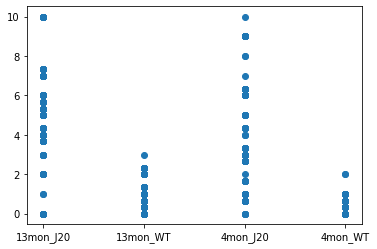

In [800]:
plt.scatter(x = df_ds.Genotype, y = df_ds['drag_step'])

In [801]:
%run statannot.py

<Figure size 432x288 with 0 Axes>

In [802]:
a = np.array(df_ds.groupby(['Genotype'])['Max_speed_filledNAN'])
b = np.array(df_ds.groupby(['Genotype'])['drag_step'])

Plotting max speed vs. genotype/age

In [741]:
# lr_model = LogisticRegression(C =0.01, penalty='l1', tol=0.001, solver='saga')
# lr_model.fit(X_tr, y_tr)
# y_pred_tr = lr_model.predict(X_tr)
# y_pred_ts = lr_model.predict(X_ts)
# print('Train acc:', accuracy_score(y_pred_tr, y_tr))
# print('Test acc:', accuracy_score(y_pred_ts, y_ts))

In [742]:
# df_merge.groupby(['animal_id']).apply(print)

In [804]:
ms = ['sp_0'+str(int(i)) if len(str(int(i)))==1 else 'sp_'+str(int(i)) for i in df_ds.Max_speed_filledNAN]

# values = df.Max_speed_filledNAN.unique()
# labels_maxspeed = dict()
# for key,value in zip(keys,values):
#     labels_maxspeed[key] = value
    
    
y_maxsp = np.array(ms)
y_maxsp.shape

(582,)

In [805]:
print(y_maxsp)
df_ds['sp_label'] = y_maxsp

['sp_06' 'sp_06' 'sp_06' 'sp_06' 'sp_06' 'sp_06' 'sp_09' 'sp_09' 'sp_09'
 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09'
 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09'
 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09'
 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09'
 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09'
 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_09' 'sp_18'
 'sp_18' 'sp_18' 'sp_18' 'sp_18' 'sp_18' 'sp_18' 'sp_18' 'sp_18' 'sp_18'
 'sp_18' 'sp_18' 'sp_18' 'sp_18' 'sp_18' 'sp_18' 'sp_18' 'sp_18' 'sp_18'
 'sp_18' 'sp_09' 'sp_18' 'sp_18' 'sp_18' 'sp_18' 'sp_18' 'sp_18' 'sp_18'
 'sp_18' 'sp_18' 'sp_15' 'sp_15' 'sp_15' 'sp_15' 'sp_15' 'sp_15' 'sp_15'
 'sp_15' 'sp_15' 'sp_15' 'sp_18' 'sp_15' 'sp_12' 'sp_12' 'sp_12' 'sp_12'
 'sp_12' 'sp_12' 'sp_12' 'sp_12' 'sp_15' 'sp_15' 'sp_15' 'sp_15' 'sp_15'
 'sp_15' 'sp_15' 'sp_15' 'sp_15' 'sp_15' 'sp_09' 's

In [806]:
ds = ['ds_0'+str(int(i)) if len(str(int(i)))==1 else 'ds_'+str(int(i)) for i in df_ds.drag_step]

In [807]:
y_dragstep = np.array(ds)
df_ds['ds_label'] = y_dragstep

In [808]:
print(y_dragstep)

['ds_10' 'ds_10' 'ds_10' 'ds_10' 'ds_10' 'ds_10' 'ds_04' 'ds_03' 'ds_04'
 'ds_03' 'ds_03' 'ds_03' 'ds_03' 'ds_03' 'ds_03' 'ds_05' 'ds_04' 'ds_04'
 'ds_04' 'ds_04' 'ds_04' 'ds_04' 'ds_04' 'ds_04' 'ds_03' 'ds_03' 'ds_03'
 'ds_03' 'ds_03' 'ds_03' 'ds_03' 'ds_03' 'ds_06' 'ds_05' 'ds_05' 'ds_05'
 'ds_05' 'ds_05' 'ds_05' 'ds_05' 'ds_05' 'ds_05' 'ds_07' 'ds_07' 'ds_07'
 'ds_07' 'ds_07' 'ds_07' 'ds_07' 'ds_07' 'ds_07' 'ds_07' 'ds_04' 'ds_06'
 'ds_03' 'ds_04' 'ds_04' 'ds_04' 'ds_04' 'ds_04' 'ds_04' 'ds_04' 'ds_01'
 'ds_00' 'ds_01' 'ds_00' 'ds_00' 'ds_00' 'ds_00' 'ds_00' 'ds_00' 'ds_00'
 'ds_01' 'ds_01' 'ds_01' 'ds_01' 'ds_01' 'ds_01' 'ds_01' 'ds_01' 'ds_01'
 'ds_01' 'ds_03' 'ds_01' 'ds_00' 'ds_01' 'ds_01' 'ds_01' 'ds_01' 'ds_01'
 'ds_01' 'ds_01' 'ds_01' 'ds_01' 'ds_01' 'ds_01' 'ds_01' 'ds_01' 'ds_01'
 'ds_01' 'ds_01' 'ds_01' 'ds_00' 'ds_01' 'ds_00' 'ds_00' 'ds_00' 'ds_00'
 'ds_00' 'ds_00' 'ds_00' 'ds_00' 'ds_00' 'ds_00' 'ds_00' 'ds_00' 'ds_00'
 'ds_00' 'ds_00' 'ds_00' 'ds_00' 'ds_00' 'ds_06' 'd

In [809]:
df_ds

,Genotype,Animal_ID,Test_Number,gentyp,age,L_vs_R,Drag_step_number_(out_of_10),Max_speed,SH_sh,SH_rho,...,KN_angv_std,AK_theta_max,AK_theta_min,AK_theta_mean,AK_angv_mean,AK_angv_std,drag_step,Max_speed_filledNAN,sp_label,ds_label
0,13mon_J20,306,1,20,13,'left',10.000000,6.0,0.198220,1.581642,...,237.852415,123.011189,49.160029,70.350826,707.014846,478.968049,10.000000,6.0,sp_06,ds_10
1,13mon_J20,306,2,20,13,'left',10.000000,6.0,0.449587,2.435294,...,290.974474,118.784058,48.612643,76.942060,611.382327,458.874056,10.000000,6.0,sp_06,ds_10
2,13mon_J20,306,3,20,13,'left',10.000000,6.0,0.287830,2.433476,...,282.087003,127.716033,53.046362,77.335066,697.996790,484.844526,10.000000,6.0,sp_06,ds_10
3,13mon_J20,306,1,20,13,'right',10.000000,6.0,0.404588,2.909112,...,215.504549,84.023790,33.321934,57.405052,529.045552,331.036974,10.000000,6.0,sp_06,ds_10
4,13mon_J20,306,2,20,13,'right',10.000000,6.0,0.284887,3.335040,...,230.963970,93.978321,33.799231,61.583070,561.809868,414.151193,10.000000,6.0,sp_06,ds_10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,4mon_WT,925,6,0,4,'right',0.666667,21.0,0.592620,2.258795,...,184.779569,101.978998,56.539840,74.325579,355.369736,308.918047,0.666667,21.0,sp_21,ds_00
578,4mon_WT,925,7,0,4,'right',0.666667,21.0,0.554613,3.160860,...,194.771512,113.651477,52.641620,75.425223,411.094109,397.781703,0.666667,21.0,sp_21,ds_00
579,4mon_WT,925,8,0,4,'right',0.666667,21.0,0.574603,2.443237,...,218.113796,113.506598,60.238003,80.438247,409.174337,372.437185,0.666667,21.0,sp_21,ds_00
580,4mon_WT,925,9,0,4,'right',0.666667,21.0,0.431413,3.874789,...,272.036128,113.566115,64.687195,80.838776,378.746184,329.881333,0.666667,21.0,sp_21,ds_00


In [810]:
df_ds['gentyp'][df_ds.gentyp == 20] = 1

In [811]:
df_ds

,Genotype,Animal_ID,Test_Number,gentyp,age,L_vs_R,Drag_step_number_(out_of_10),Max_speed,SH_sh,SH_rho,...,KN_angv_std,AK_theta_max,AK_theta_min,AK_theta_mean,AK_angv_mean,AK_angv_std,drag_step,Max_speed_filledNAN,sp_label,ds_label
0,13mon_J20,306,1,1,13,'left',10.000000,6.0,0.198220,1.581642,...,237.852415,123.011189,49.160029,70.350826,707.014846,478.968049,10.000000,6.0,sp_06,ds_10
1,13mon_J20,306,2,1,13,'left',10.000000,6.0,0.449587,2.435294,...,290.974474,118.784058,48.612643,76.942060,611.382327,458.874056,10.000000,6.0,sp_06,ds_10
2,13mon_J20,306,3,1,13,'left',10.000000,6.0,0.287830,2.433476,...,282.087003,127.716033,53.046362,77.335066,697.996790,484.844526,10.000000,6.0,sp_06,ds_10
3,13mon_J20,306,1,1,13,'right',10.000000,6.0,0.404588,2.909112,...,215.504549,84.023790,33.321934,57.405052,529.045552,331.036974,10.000000,6.0,sp_06,ds_10
4,13mon_J20,306,2,1,13,'right',10.000000,6.0,0.284887,3.335040,...,230.963970,93.978321,33.799231,61.583070,561.809868,414.151193,10.000000,6.0,sp_06,ds_10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,4mon_WT,925,6,0,4,'right',0.666667,21.0,0.592620,2.258795,...,184.779569,101.978998,56.539840,74.325579,355.369736,308.918047,0.666667,21.0,sp_21,ds_00
578,4mon_WT,925,7,0,4,'right',0.666667,21.0,0.554613,3.160860,...,194.771512,113.651477,52.641620,75.425223,411.094109,397.781703,0.666667,21.0,sp_21,ds_00
579,4mon_WT,925,8,0,4,'right',0.666667,21.0,0.574603,2.443237,...,218.113796,113.506598,60.238003,80.438247,409.174337,372.437185,0.666667,21.0,sp_21,ds_00
580,4mon_WT,925,9,0,4,'right',0.666667,21.0,0.431413,3.874789,...,272.036128,113.566115,64.687195,80.838776,378.746184,329.881333,0.666667,21.0,sp_21,ds_00


In [812]:
df_ds['Drag_step_number_(out_of_10)'].round().value_counts()

1.0     124
0.0      76
6.0      40
3.0      39
2.0      24
4.0      10
10.0      9
5.0       8
7.0       7
9.0       2
8.0       2
Name: Drag_step_number_(out_of_10), dtype: int64

In [813]:
df_ml = copy.deepcopy(df_merge)

In [814]:
# df_ml.insert(5, 'sp_label', df_ds.sp_label)
df_ml.insert(5, 'speed', df_ds.Max_speed)

In [815]:
# df_ml.insert(6, 'ds_label', df_ds.ds_label)
df_ml.insert(6, 'drag_step', df_ds['Drag_step_number_(out_of_10)'])

In [816]:
# df_ml.insert(7, 'age', df_ds.age)

In [817]:
df_ml

,genotype,animal_id,test_number,gentyp,age,speed,drag_step,l_vs_r,SH_sh,SH_rho,...,KN_theta_max,KN_theta_min,KN_theta_mean,KN_theta_std,KN_angv_mean,KN_angv_std,AK_theta_max,AK_theta_min,AK_theta_mean,AK_angv_mean
0,0,306,1,20,13,6.0,10.000000,'left',-1.771878,-1.331161,...,-0.236546,0.248598,-0.050575,-0.456095,0.773454,0.035627,0.653768,0.530192,0.113804,1.448513
1,0,306,2,20,13,6.0,10.000000,'left',0.008984,-1.062779,...,-0.139309,0.071121,0.083403,-0.216050,0.527527,0.733183,0.489935,0.492922,0.504903,0.826373
2,0,306,3,20,13,6.0,10.000000,'left',-1.137014,-1.063351,...,-0.005650,-0.045425,-0.040466,-0.154358,1.406401,0.616480,0.836117,0.794800,0.528222,1.389845
3,0,306,1,20,13,6.0,10.000000,'right',-0.309817,-0.913815,...,0.340107,0.821132,0.588994,0.045149,0.667610,-0.257827,-0.857292,-0.548175,-0.654350,0.290730
4,0,306,2,20,13,6.0,10.000000,'right',-1.157867,-0.779907,...,0.249122,0.896909,0.752522,-0.609804,0.846012,-0.054826,-0.471477,-0.515678,-0.406442,0.503879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,3,925,6,0,4,21.0,0.666667,'right',1.022334,-1.118269,...,1.370882,1.409776,1.476620,1.099800,-0.125652,-0.661282,-0.161390,1.032660,0.349650,-0.839121
578,3,925,7,0,4,21.0,0.666667,'right',0.753064,-0.834667,...,1.111257,1.479769,1.402393,-0.148717,-0.119121,-0.530076,0.291008,0.767242,0.414899,-0.476605
579,3,925,8,0,4,21.0,0.666667,'right',0.894689,-1.060282,...,1.111257,1.658184,1.406899,-0.075193,-0.345617,-0.223564,0.285393,1.284456,0.712353,-0.489095
580,3,925,9,0,4,21.0,0.666667,'right',-0.119770,-0.610214,...,1.237487,1.758196,1.573711,0.199209,-0.246824,0.484500,0.287699,1.587388,0.736119,-0.687046


In [992]:
# Create correlation matrix
corr = df_ml.iloc[:,8:].corr()
corr_matrix = corr.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]

# Drop features 
df_ml2 = copy.deepcopy(df_ml.iloc[:,8:])
df_ml2.drop(to_drop, axis=1, inplace = True)
df_ml2 = df_ml.iloc[:,:8].merge(df_ml2, how = 'inner', left_index=True, right_index=True)

In [993]:
df_ml2

,genotype,animal_id,test_number,gentyp,age,speed,drag_step,l_vs_r,SH_sh,SH_rho,...,EL_angv_mean,SH_theta_std,HP_angv_mean,KN_theta_max,KN_theta_std,KN_angv_mean,KN_angv_std,AK_theta_max,AK_theta_min,AK_angv_mean
0,0,306,1,20,13,6.0,10.000000,'left',-1.771878,-1.331161,...,0.588854,-0.665847,-0.175616,-0.236546,-0.456095,0.773454,0.035627,0.653768,0.530192,1.448513
1,0,306,2,20,13,6.0,10.000000,'left',0.008984,-1.062779,...,0.396039,-0.572115,-0.491072,-0.139309,-0.216050,0.527527,0.733183,0.489935,0.492922,0.826373
2,0,306,3,20,13,6.0,10.000000,'left',-1.137014,-1.063351,...,-0.200294,-0.373283,0.455374,-0.005650,-0.154358,1.406401,0.616480,0.836117,0.794800,1.389845
3,0,306,1,20,13,6.0,10.000000,'right',-0.309817,-0.913815,...,1.667722,0.163309,0.266092,0.340107,0.045149,0.667610,-0.257827,-0.857292,-0.548175,0.290730
4,0,306,2,20,13,6.0,10.000000,'right',-1.157867,-0.779907,...,0.716878,0.268843,1.497906,0.249122,-0.609804,0.846012,-0.054826,-0.471477,-0.515678,0.503879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,3,925,6,0,4,21.0,0.666667,'right',1.022334,-1.118269,...,-1.024833,-0.471218,-0.272760,1.370882,1.099800,-0.125652,-0.661282,-0.161390,1.032660,-0.839121
578,3,925,7,0,4,21.0,0.666667,'right',0.753064,-0.834667,...,-0.935425,-0.374732,-0.299024,1.111257,-0.148717,-0.119121,-0.530076,0.291008,0.767242,-0.476605
579,3,925,8,0,4,21.0,0.666667,'right',0.894689,-1.060282,...,-1.114084,-0.456948,0.011102,1.111257,-0.075193,-0.345617,-0.223564,0.285393,1.284456,-0.489095
580,3,925,9,0,4,21.0,0.666667,'right',-0.119770,-0.610214,...,-0.838606,-0.880798,0.450264,1.237487,0.199209,-0.246824,0.484500,0.287699,1.587388,-0.687046


In [1031]:
df_ml['gentyp'][df_ml.gentyp == 20] = 1

In [1032]:
df_ml

,genotype,animal_id,test_number,gentyp,age,speed,drag_step,l_vs_r,SH_sh,SH_rho,...,KN_theta_max,KN_theta_min,KN_theta_mean,KN_theta_std,KN_angv_mean,KN_angv_std,AK_theta_max,AK_theta_min,AK_theta_mean,AK_angv_mean
0,0,306,1,1,13,6.0,10.000000,'left',-1.771878,-1.331161,...,-0.236546,0.248598,-0.050575,-0.456095,0.773454,0.035627,0.653768,0.530192,0.113804,1.448513
1,0,306,2,1,13,6.0,10.000000,'left',0.008984,-1.062779,...,-0.139309,0.071121,0.083403,-0.216050,0.527527,0.733183,0.489935,0.492922,0.504903,0.826373
2,0,306,3,1,13,6.0,10.000000,'left',-1.137014,-1.063351,...,-0.005650,-0.045425,-0.040466,-0.154358,1.406401,0.616480,0.836117,0.794800,0.528222,1.389845
3,0,306,1,1,13,6.0,10.000000,'right',-0.309817,-0.913815,...,0.340107,0.821132,0.588994,0.045149,0.667610,-0.257827,-0.857292,-0.548175,-0.654350,0.290730
4,0,306,2,1,13,6.0,10.000000,'right',-1.157867,-0.779907,...,0.249122,0.896909,0.752522,-0.609804,0.846012,-0.054826,-0.471477,-0.515678,-0.406442,0.503879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,3,925,6,0,4,21.0,0.666667,'right',1.022334,-1.118269,...,1.370882,1.409776,1.476620,1.099800,-0.125652,-0.661282,-0.161390,1.032660,0.349650,-0.839121
578,3,925,7,0,4,21.0,0.666667,'right',0.753064,-0.834667,...,1.111257,1.479769,1.402393,-0.148717,-0.119121,-0.530076,0.291008,0.767242,0.414899,-0.476605
579,3,925,8,0,4,21.0,0.666667,'right',0.894689,-1.060282,...,1.111257,1.658184,1.406899,-0.075193,-0.345617,-0.223564,0.285393,1.284456,0.712353,-0.489095
580,3,925,9,0,4,21.0,0.666667,'right',-0.119770,-0.610214,...,1.237487,1.758196,1.573711,0.199209,-0.246824,0.484500,0.287699,1.587388,0.736119,-0.687046


In [1455]:
df_ml_4m = df_ml[df_ml.age == 4]
df_ml_13m = df_ml[df_ml.age == 13]

In [1456]:
df_ml_4m.fillna( method = 'ffill', inplace = True)

In [1457]:
df_ml_13m.fillna( method = 'ffill', inplace = True)

In [1098]:
# df_ml_4m['sp_label'] = df_ml_4m['sp_label'].factorize()[0]
# df_ml_13m['sp_label'] = df_ml_13m['sp_label'].factorize()[0]

In [1099]:
# df_ml_4m['ds_label'] = df_ml_4m['ds_label'].factorize()[0]
# df_ml_13m['ds_label'] = df_ml_13m['ds_label'].factorize()[0]

In [1100]:
# df_ml[df_ml.age==0].set_index(['animal_id', 'gentyp', 'age','genotype', 'sp_label', 'ds_label','l_vs_r']).iloc[:, 1:]

In [1250]:
df_ml_4m.dropna(how = 'any', inplace = True)
df_ml_13m.dropna(how = 'any', inplace = True)

In [1458]:
# split into 4 and 13 months
dfml_4m = df_ml_4m.set_index(['animal_id', 'gentyp', 'age','genotype', 'drag_step', 'speed' ,'l_vs_r']).iloc[:, 1:]
dfml_13m = df_ml_13m.set_index(['animal_id', 'gentyp', 'age','genotype','drag_step','speed','l_vs_r']).iloc[:, 1:]

In [1459]:
df_ml_13m

,genotype,animal_id,test_number,gentyp,age,speed,drag_step,l_vs_r,SH_sh,SH_rho,...,KN_theta_max,KN_theta_min,KN_theta_mean,KN_theta_std,KN_angv_mean,KN_angv_std,AK_theta_max,AK_theta_min,AK_theta_mean,AK_angv_mean
0,0,306,1,1,13,6.0,10.0,'left',-1.771878,-1.331161,...,-0.236546,0.248598,-0.050575,-0.456095,0.773454,0.035627,0.653768,0.530192,0.113804,1.448513
1,0,306,2,1,13,6.0,10.0,'left',0.008984,-1.062779,...,-0.139309,0.071121,0.083403,-0.216050,0.527527,0.733183,0.489935,0.492922,0.504903,0.826373
2,0,306,3,1,13,6.0,10.0,'left',-1.137014,-1.063351,...,-0.005650,-0.045425,-0.040466,-0.154358,1.406401,0.616480,0.836117,0.794800,0.528222,1.389845
3,0,306,1,1,13,6.0,10.0,'right',-0.309817,-0.913815,...,0.340107,0.821132,0.588994,0.045149,0.667610,-0.257827,-0.857292,-0.548175,-0.654350,0.290730
4,0,306,2,1,13,6.0,10.0,'right',-1.157867,-0.779907,...,0.249122,0.896909,0.752522,-0.609804,0.846012,-0.054826,-0.471477,-0.515678,-0.406442,0.503879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0,738,6,1,13,15.0,2.0,'right',1.444807,-0.947356,...,0.821314,0.718090,0.861040,0.586155,0.487968,0.244698,-0.023065,-0.311143,-0.433135,0.127303
298,0,738,7,1,13,15.0,2.0,'right',1.485183,-1.244906,...,0.821314,0.729769,1.003729,0.470329,0.973705,0.154826,0.276620,-0.278056,-0.364575,0.106046
299,0,738,8,1,13,15.0,2.0,'right',1.606980,-0.577637,...,0.741558,0.623888,0.831738,0.384001,0.299178,-0.272498,-0.019766,0.007538,-0.299714,0.236987
300,0,738,9,1,13,15.0,2.0,'right',-0.703750,-1.088868,...,0.520042,0.528954,0.672235,0.495083,-0.162497,-0.990692,0.234335,-0.312637,-0.101533,0.447116


In [1253]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LassoLars
from sklearn.metrics import mean_absolute_error, max_error, explained_variance_score, mean_squared_error, r2_score

In [1624]:
# Leave-One-Out Cross Validation 

def loocv_multi(data, model, group, p = 1, scaler = MinMaxScaler(), \
          bootstrap = 'y', bstp_n = 100, mu = 0.0, sigma = 0.4, \
          with_pca = 'n', averaging = 'n', metric = mean_absolute_error, fi_id = 4):
    
    '''p-leave-out cross validation function'''
    
    n_subj = len(data.index.get_level_values(level = 0).unique())
  
    train_acc = [] #{}
    test_acc =  [] #{}
    test_rmse = []

    for i in range(n_subj-p):

        train = data.loc[data.index.levels[0][list(range(0,i))+list(range(i+p, n_subj))].tolist()]
        test  = data.loc[data.index.levels[0][i:i+p].tolist()]

        #  Bootstrapping training data 
        data_bt = copy.deepcopy(data)
        if bootstrap.lower() == 'y':
            train_bt = resample(train, replace=True, n_samples = bstp_n, random_state=1234)
            data_bt = pd.concat([data,train_bt], axis = 0).sort_index(level = 0)
            train = pd.concat([train,train_bt], axis = 0).sort_index(level = 0)
        
        # Train and test input (X)
        X_train = np.array(train)
        X_tr = scaler.fit_transform(X_train)
        X_test = np.array(test)
        X_ts = scaler.transform(X_test)

        # Add Gaussian noise to the training data
        for j in range(X_tr.shape[1]):
            noise = np.random.normal(mu, sigma)
            X_tr[:,j] += noise

        # Train and test output (Y)
        Y_tr_g = np.array(data_bt.index.get_level_values(level  =1))[X_ts.shape[0]:]
        Y_ts_g = np.array(data_bt.index.get_level_values(level  =1))[:X_ts.shape[0]]
        
        Y_tr_sp = np.array(data_bt.index.get_level_values(level  =5))[X_ts.shape[0]:]
        Y_ts_sp = np.array(data_bt.index.get_level_values(level  =5))[:X_ts.shape[0]]
        
        Y_tr_ds = np.array(data_bt.index.get_level_values(level  =4))[X_ts.shape[0]:]
        Y_ts_ds = np.array(data_bt.index.get_level_values(level  =4))[:X_ts.shape[0]]

        if group == 'sp':
            Y_tr =  Y_tr_sp
            Y_ts = Y_ts_sp
        elif group == 'ds':
            Y_tr =  Y_tr_ds  #Y_tr_g , Y_tr_ds,
            Y_ts = Y_ts_ds   # Y_ts_g , Y_ts_ds ,
        
        ml = model
            
        #         PCA
        pca = PCA(n_components = 22) 
        pca.fit(X_tr)

        if with_pca.lower() == 'y':
            mt = ml.fit(pca.transform(X_tr),Y_tr)
            Y_pr_tr = mt.predict(pca.transform(X_tr))
            Y_pr = mt.predict(pca.transform(X_ts))
        else:
            mt =  ml.fit(X_tr,Y_tr)
            Y_pr_tr = mt.predict(X_tr)
            Y_pr = mt.predict(X_ts)
            rmse = np.sqrt(mean_squared_error(Y_pr, Y_ts))
        
        train_acc.append(metric(Y_pr_tr,Y_tr))
        test_acc.append(metric(Y_pr,Y_ts))
        test_rmse.append(rmse)
    
    
        #     Feature importance
        if i == fi_id:
            # fit the model
            model.fit(X_tr, Y_tr)
            # perform permutation importance
            results = permutation_importance(model, X_tr, Y_tr, scoring='neg_mean_squared_error')
            # get importance
#             importance = results.importances_mean
            feature_imp = pd.Series(results.importances_mean, index = data.columns)
        
    return train_acc, test_acc, test_rmse ,feature_imp

train MAE: 4.800111364399266 +/- 0.03886345222894201
test MAE:4.921816990693713 +/- 0.5098020022115424
test RMSE: 4.929293043377436 +/- 0.5090116032395022


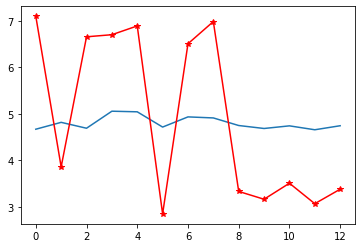

In [1725]:
train_acc = []
train_acc_sem = []

test_acc = []
test_acc_sem = []

test_bacc = []
test_bacc_sem = []

test_f1 = []
test_f1_sem = []

test_fnr = []
test_fnr_sem = []

rf = RandomForestRegressor( n_estimators=500,
                            criterion='mse',
                            max_depth=10,
                            min_samples_split=0.0001,
                            min_samples_leaf=1,
                            min_weight_fraction_leaf=0.0,
                            max_features='auto',
                            max_leaf_nodes=2,
                            min_impurity_decrease=0.1,
                            min_impurity_split=None,
                            bootstrap=True,
                            oob_score=True,
                            n_jobs=None,
                            random_state=1234,
                            verbose=0,
                            warm_start=False,
                            ccp_alpha=0.015,
                            max_samples=None)

# # tuned for ds: no bootstrap, mu = sigma = 0
# reg = SVR(kernel='sigmoid',
#     degree=2,
#     gamma='auto',
#     coef0=0.0,
#     tol=0.00001,
#     C=10.0,
#     epsilon=0.0,
#     shrinking=True,
#     cache_size=200,
#     verbose=False,
#     max_iter=-1,
# )

# tuned for sp: bootstrap = 'y', bstp_n =850, mu = sigma = 0
reg = SVR(kernel='sigmoid',
    degree=2,
    gamma='auto',
    coef0=0.0,
    tol=0.00001,
    C=0.2,
    epsilon=0.0,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

# Run simulation (cross validation)
tr_acc, ts_acc, test_rmse, feture_imp = loocv_multi(dfml_4m, reg, 'sp', \
                                p = 1, scaler = MinMaxScaler(), \
                                  bootstrap = 'y', bstp_n =850, mu= 0.0,  sigma = 0.0, \
                                  with_pca = 'n', averaging = 'n',metric = mean_absolute_error, fi_id =11)

plt.plot(tr_acc)
plt.plot(ts_acc, c = 'r', marker = '*')

print('train MAE: {} +/- {}'.format(np.mean(tr_acc), sem(tr_acc)))
print('test MAE:{} +/- {}'.format(np.mean(ts_acc), sem(ts_acc)))
print('test RMSE: {} +/- {}'.format(np.mean(test_rmse), sem(test_rmse)))

In [16]:
?SVR

Object `SVR` not found.


81


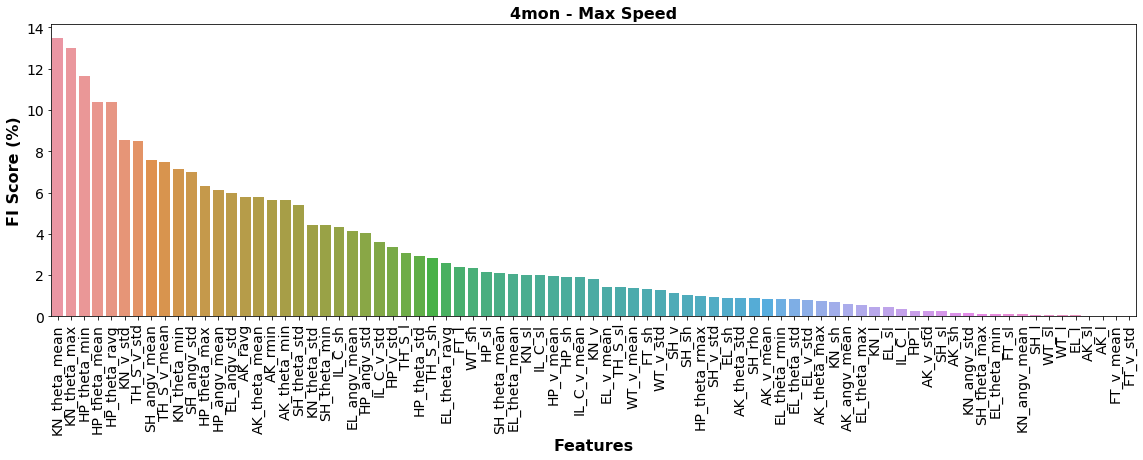

In [1727]:
# redraw FI features

# feature_imp = fi.iloc[:, 1]

# FI_select = feture_imp[feture_imp*100 >= 0.5]*100
FI_select = abs(feture_imp)*100
print(len(FI_select))
plt.figure(figsize=(16,6.5))
sns.barplot(y=FI_select.sort_values(ascending=False), x = FI_select.sort_values(ascending=False).index)
plt.xlabel('Features', fontsize = 16, fontweight='bold')
plt.ylabel('FI Score (%)', fontsize = 16, fontweight='bold')
# plt.ylim([0,50])
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)
plt.title('4mon - Max Speed', fontsize = 16, fontweight='bold')
plt.tight_layout()

# # plotting
# plt.savefig('4mon-MaxSpeed')

# # save as TIFF
# png1 = BytesIO()
# plt.savefig(png1, format='png')
# png2 = Image.open(png1)

# png2.save('4mon-MaxSpeed.tiff')
# png1.close()

In [1664]:
FI_regression = pd.DataFrame()

In [1728]:
FI_regression['4m_MaxSpeed'] = abs(feture_imp)*100

In [1729]:
FI_regression

,4m_DragStep,4m_MaxSpeed
SH_sh,2.235800,1.014767
SH_rho,0.013823,0.868273
SH_l,1.101072,0.083815
SH_v,1.042617,1.136699
IL_C_l,0.467741,0.351163
...,...,...
KN_angv_std,0.623482,0.136822
AK_theta_max,0.076004,0.728918
AK_theta_min,7.655361,5.627379
AK_theta_mean,9.539127,5.762942


train mae: 4.624902045329689 +/- 0.16216598158445317
test mae:4.687085663285302 +/- 0.44581544944089313
test RMSE: 4.998358193937638 +/- 0.43393032453137853


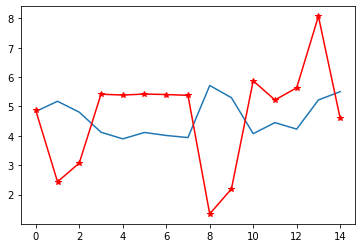

In [2017]:
train_acc = []
train_acc_sem = []

test_acc = []
test_acc_sem = []

test_bacc = []
test_bacc_sem = []

test_f1 = []
test_f1_sem = []

test_fnr = []
test_fnr_sem = []

rf = RandomForestRegressor(n_estimators=300,
                                criterion='mse',
                                max_depth=5,
                                min_samples_split=.0001,
                                min_samples_leaf=10,
                                min_weight_fraction_leaf=0.0,
                                max_features='auto',
                                max_leaf_nodes=2,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None,
                                bootstrap=True,
                                oob_score=True,
                                n_jobs=None,
                                random_state=1342,
                                verbose=0,
                                warm_start=False,
                                ccp_alpha=0.01,
                                max_samples=None)


# from sklearn import linear_model
from sklearn.linear_model import LinearRegression, BayesianRidge, TweedieRegressor, Ridge, Perceptron, Lasso, LassoLars
from sklearn.isotonic import IsotonicRegression
from sklearn import ensemble
from sklearn.svm import SVR
# from sklearn.gaussian_process import GaussianProcess

# tuned for ds
reg = SVR(kernel='sigmoid',
    degree=1,
    gamma='scale',
    coef0=0.01,
    tol=0.00001,
    C=2.2,
    epsilon=0.0,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=90,
)

# # tuned for sp
# reg = Lasso(
#     alpha=1.8,
#     fit_intercept=False,
#     normalize=True,
#     precompute=False,
#     copy_X=True,
#     max_iter=10,
#     tol=0.0001,
#     warm_start=False,
#     positive=False,
#     random_state=None,
#     selection='cyclic',
# )
            
tr_acc, ts_acc, test_rmse, feature_imp = loocv_multi(dfml_13m, reg , group = 'sp',\
                            p = 1, scaler = MinMaxScaler(), \
                            bootstrap = 'n', bstp_n = 850, mu = 0.0,  sigma =0.0, \
                            with_pca = 'n', averaging = 'n', metric = mean_absolute_error, fi_id = 8)

plt.plot(tr_acc)
plt.plot(ts_acc, c = 'r', marker = '*')

print('train mae: {} +/- {}'.format(np.mean(tr_acc), sem(tr_acc)))
print('test mae:{} +/- {}'.format(np.mean(ts_acc), sem(ts_acc)))
print('test RMSE: {} +/- {}'.format(np.mean(test_rmse), sem(test_rmse)))

81


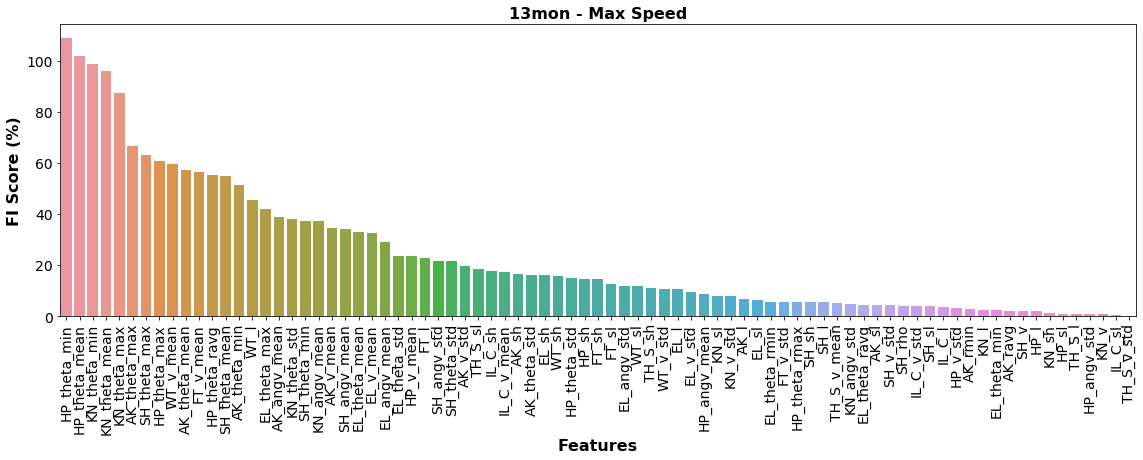

In [2018]:
# FI_select = feature_imp[feature_imp*100 >= 0.5]*100
FI_select = abs(feature_imp)*100
print(len(FI_select))
plt.figure(figsize=(16,6.5))
sns.barplot(y=FI_select.sort_values(ascending=False), x = FI_select.sort_values(ascending=False).index)
plt.xlabel('Features', fontsize = 16, fontweight='bold')
plt.ylabel('FI Score (%)', fontsize = 16, fontweight='bold')
# plt.ylim([0,45])
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)
plt.title('13mon - Max Speed', fontsize = 16, fontweight='bold')
plt.tight_layout()

# # plotting
# plt.savefig('13mon-MaxSpeed')

# # save as TIFF
# png1 = BytesIO()
# plt.savefig(png1, format='png')
# png2 = Image.open(png1)

# png2.save('13mon-MaxSpeed.tiff')
# png1.close()

In [1905]:
FI_regression.sum(axis = 0)

4m_DragStep     230.864762
4m_MaxSpeed     236.555511
13m_DragStep    320.756823
dtype: float64

In [1965]:
FI_regression['13m_MaxSpeed'] = abs(feature_imp)*100

In [1968]:
sums = FI_regression.sum(axis = 0)
FI_regression = FI_regression / sums

In [1978]:
FI_regression.to_csv('FI_reg.csv')

In [1972]:
FI_regression.max(axis = 0)

4m_DragStep     0.112363
4m_MaxSpeed     0.056961
13m_DragStep    0.041902
13m_MaxSpeed    0.048341
dtype: float64

81


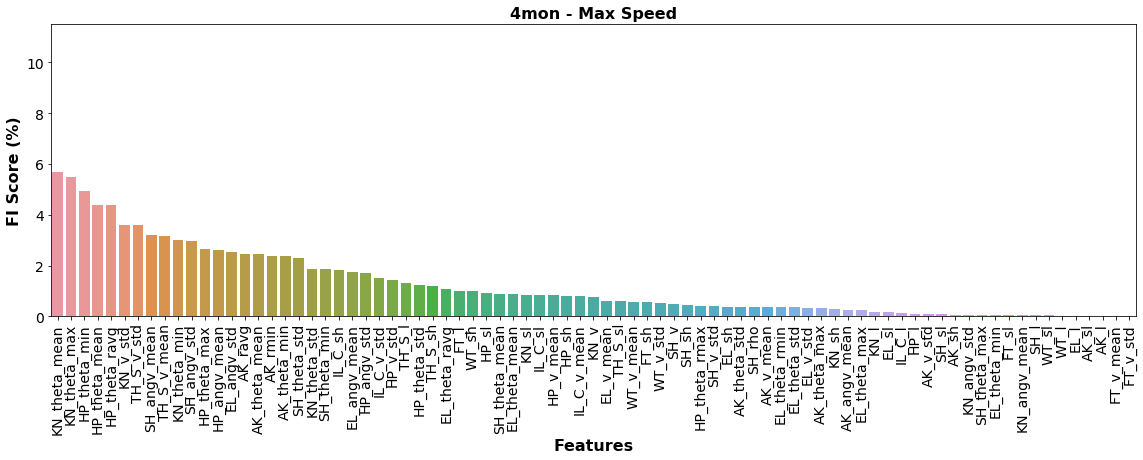

In [1977]:
# FI_select = feature_imp[feature_imp*100 >= 0.5]*100
FI_select = np.abs(FI_regression.iloc[:,1])*100
print(len(FI_select))
plt.figure(figsize=(16,6.5))
sns.barplot(y=FI_select.sort_values(ascending=False), x = FI_select.sort_values(ascending=False).index)
plt.xlabel('Features', fontsize = 16, fontweight='bold')
plt.ylabel('FI Score (%)', fontsize = 16, fontweight='bold')
plt.ylim([0,11.5])
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)
plt.title('4mon - Max Speed', fontsize = 16, fontweight='bold')
plt.tight_layout()

# plotting
plt.savefig('4mon - Max Speed')

# save as TIFF
png1 = BytesIO()
plt.savefig(png1, format='png')
png2 = Image.open(png1)

png2.save('4mon - Max Speed.tiff')
png1.close()

# Feature selection and Model retraining

In [1579]:
def plot_permutation_imp(imp, df, title, figname, save = 'n'):
    perm_imp = pd.DataFrame()
    perm_imp['feature'] = df.columns
    perm_imp['importances'] = imp
    perm_imp['importances'] = abs(perm_imp['importances'])
    perm_imp1 = perm_imp.sort_values(by = 'importances', ascending = False)

    #     Visualizing features based on their importance
    plt.figure(figsize=(16,5.5))
    sns.barplot(y=perm_imp1['importances']*100, x = perm_imp1['feature'])
    plt.xlabel('Features', fontsize = 14, fontweight='bold')
    plt.ylabel('FI Score (%)', fontsize = 14, fontweight='bold')
    plt.xticks(fontsize = 13, rotation = 90)
    plt.yticks(fontsize = 13)
#     plt.ylim([0,9.5])
    plt.title('Permutation Importance - {}'.format(title), fontsize = 15, fontweight='bold')
    plt.tight_layout()
    if save == 'y':
        plt.savefig(figname)

        # save as TIFF
        png1 = BytesIO()
        plt.savefig(png1, format='png')
        png2 = Image.open(png1)

        png2.save(figname+'.tiff')
        png1.close()

    plt.show()

In [1545]:
def oob_classifier_accuracy(rf, X_train, y_train):
    """
    Compute out-of-bag (OOB) accuracy for a scikit-learn random forest
    classifier. We learned the guts of scikit's RF from the BSD licensed
    code:
    https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/ensemble/forest.py#L425
    """
    X = np.array(X_train)
    y = np.array(y_train)
    
    n_samples = len(X)
    n_classes = len(np.unique(y))
    predictions = np.zeros((n_samples, n_classes))
    
    for tree in rf.estimators_:
        unsampled_indices = _generate_unsampled_indices(tree.random_state, n_samples, 100)
        tree_preds = tree.predict_proba(X[unsampled_indices])
        predictions[unsampled_indices] += tree_preds
        
    predicted_class_indexes = np.argmax(predictions, axis=1)
    predicted_classes = [rf.classes_[i] for i in predicted_class_indexes]
    
    oob_score = np.mean(y == predicted_classes)
    return oob_score

In [1546]:
def permutation_importances(model, X_train, y_train, metric):
    ''' Return the permuation importance matrix in numpy array format'''
    baseline = metric(model,X_train,y_train)
    imp = []
    for col in X_train.columns:
        save = copy.deepcopy(X_train.iloc[:,col])
        X_train.iloc[:,col] = np.random.permutation(X_train.iloc[:,col])
        m = metric(model,X_train,y_train)
        X_train.iloc[:,col] = save
        imp.append(baseline - m)
    return np.array(imp)

In [1926]:
rf = RandomForestClassifier(n_estimators=300,
                                max_depth=1.5,
                                min_samples_split=0.00001,
                                min_samples_leaf=1,
                                min_weight_fraction_leaf=0.0,
                                min_impurity_decrease=0.0,
                                bootstrap=True,
                                oob_score=True,
                                verbose=0,
                                warm_start=True,
                                ccp_alpha=0.0)

data = df_13m

scaler = MinMaxScaler()

i = 1
p = 1
n_subj = len(data.index.get_level_values(level = 0).unique())

train = data.loc[data.index.levels[0][list(range(0,i))+list(range(i+p, n_subj))].tolist()]
test  = data.loc[data.index.levels[0][i:i+p].tolist()]
bstp_n = 550

#  Bootstrapping training data 
data_bt = copy.deepcopy(data)
train_bt = resample(train, replace=True, n_samples = bstp_n, random_state=123)
data_bt = pd.concat([data,train_bt], axis = 0).sort_index(level = 0)
train = pd.concat([train,train_bt], axis = 0).sort_index(level = 0)

# Train and test input (X)
X_train = np.array(train)
X_tr = scaler.fit_transform(X_train)
X_test = np.array(test)
X_ts = scaler.transform(X_test)

# Add Gaussian noise to the training data
mu, sigma = 0.01, 0.35
for j in range(X_tr.shape[1]):
    noise = np.random.normal(mu, sigma)
    X_tr[:,j] += noise

# Train and test output (Y)
Y_tr = np.array(data_bt.index.get_level_values(level  =1))[X_ts.shape[0]:]
Y_ts = np.array(data_bt.index.get_level_values(level  =1))[:X_ts.shape[0]]

In [1927]:
clf = rf.fit(X_tr, Y_tr)
perm = PermutationImportance(clf)
perm_imp = perm.fit(X_ts, Y_ts)

In [1936]:
# # eli5.show_weights(perm_imp)
# df_perm = eli5.explain_weights_df(perm_imp).sort_values(by='feature')
# df_perm['feature'] = list(df_4m.columns)
# df_perm['weight'] = abs(df_perm['weight'])
# df_perm = df_perm.sort_values(by ='weight', ascending = False)

# #     Visualizing features based on their importance
# plt.figure(figsize=(16,5.5))
# sns.barplot(y=df_perm.weight*100, x = df_perm.feature)
# plt.xlabel('Features', fontsize = 13, fontweight='bold')
# plt.ylabel('FI Score (%)', fontsize = 13, fontweight='bold')
# plt.xticks(fontsize = 13, rotation = 90)
# plt.yticks(fontsize = 13)
# plt.title('Permutation Importance, Bilateral', fontsize = 14, fontweight='bold')
# plt.tight_layout()
# plt.show()


In [1929]:
# Bilateral
X_p = pd.DataFrame(X_tr)
y_p = pd.Series(Y_tr)
imp1 = permutation_importances(clf, X_p,y_p,oob_classifier_accuracy)

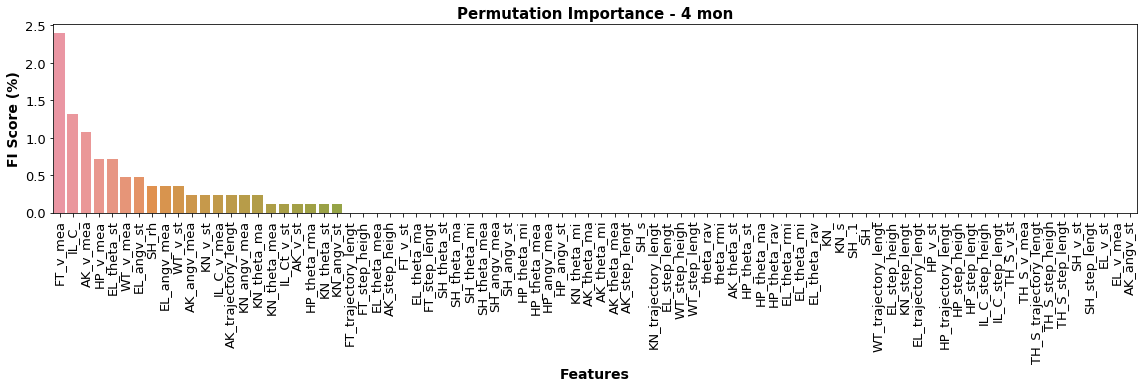

In [1930]:
plot_permutation_imp(imp1, df_13m, '4 mon', 'FigS2a2', save = 'n')

In [1960]:
# fit the model
data = df_13m
model = RandomForestClassifier(n_estimators=2000,
                                max_depth=2.1,
                                min_samples_split=0.00001,
                                min_samples_leaf=1,
                                min_weight_fraction_leaf=0.0,
                                min_impurity_decrease=0.0,
                                bootstrap=True,
                                oob_score=True,
                                verbose=0,
                                warm_start=True,
                                ccp_alpha=0.0,
                               random_state=42)
model.fit(X_tr, Y_tr)

# perform permutation importance
results = permutation_importance(model, X_tr, Y_tr, n_repeats=20,
                                random_state=42, n_jobs=2)
# get importance
#             importance = results.importances_mean
imp2 = np.abs(results.importances_mean)

In [1961]:
np.sum(np.abs(results.importances_mean))

0.2733253588516745

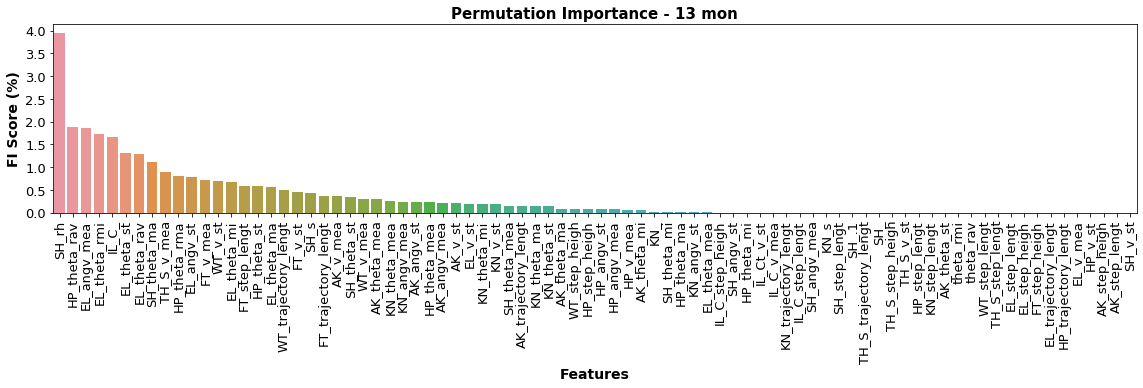

In [1962]:
plot_permutation_imp(imp2, df_13m, '13 mon', 'FigS2a2', save = 'n')

In [1593]:
dff = pd.DataFrame([data.columns, imp1*100, imp2*100]).T
dff.sort_values(by = 2, ascending = False).head(15)

,0,1,2
12,HP_theta_st,3.58025,3.57518
69,HP_angv_mea,2.34568,3.55218
7,EL_theta_rav,2.71605,3.45691
67,HP_theta_mi,2.46914,1.71349
71,KN_theta_ma,0.987654,1.26324
8,EL_theta_mi,1.23457,1.10615
10,HP_theta_rav,0.617284,1.03309
57,EL_theta_mea,0.617284,0.928386
60,EL_angv_st,0.246914,0.908958
64,SH_theta_st,0.123457,0.905336


In [1906]:
dff.sum(axis = 0)

0    SH_sSH_rhSH_SH_.1IL_C_KN_sKN_EL_theta_ravEL_th...
1                                              13.0864
2                                              27.7127
dtype: object

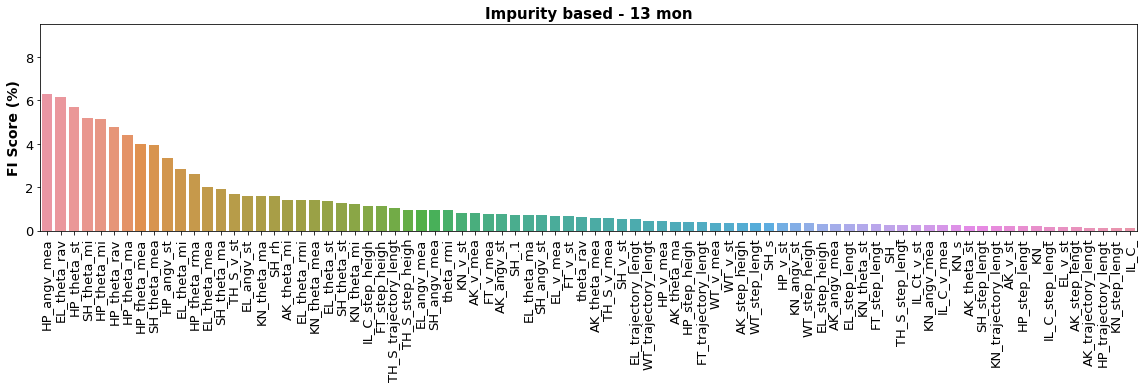

In [861]:
#     Visualizing features based on their importance
f1 = f.sort_values(by = '4m_BL', ascending = False)
plt.figure(figsize=(16,5.5))
sns.barplot(y=f1['4m_BL'], x = f1.index)
plt.ylabel('FI Score (%)', fontsize = 14, fontweight='bold')
plt.xticks(fontsize = 13, rotation = 90)
plt.yticks(fontsize = 13)
plt.ylim([0,9.5])
plt.title('Impurity based - {}'.format('13 mon'), fontsize = 15, fontweight='bold')
plt.tight_layout()

plt.savefig('FigS2b2')

# save as TIFF
png1 = BytesIO()
plt.savefig(png1, format='png')
png2 = Image.open(png1)

png2.save('FigS2b2.tiff')
png1.close()

plt.show()

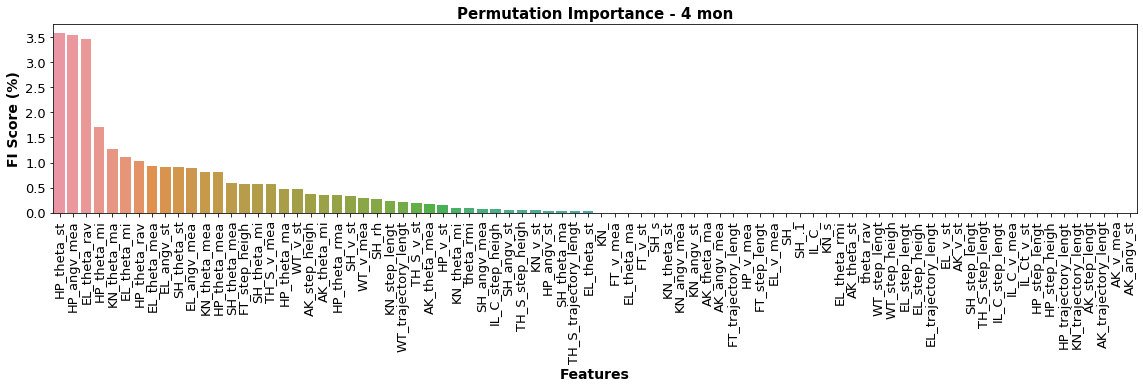

In [1596]:
plot_permutation_imp(imp2, df_4m, '4 mon', 'FigS2a2', save = 'n')

In [854]:
f['perm_4m_BL'] = abs(imp)*100

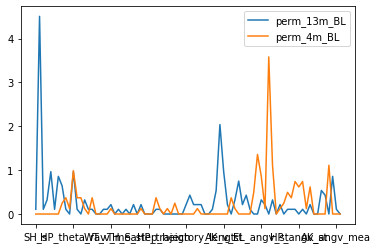

In [856]:
f.iloc[:,-2:].plot()

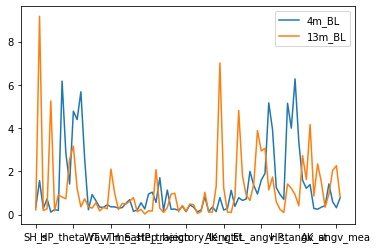

In [857]:
f.iloc[:,:2].plot()

In [860]:
f.to_csv('FI.csv')

## Re-evaluate the model with reduced feature list from feature ranking

In [132]:
FI = pd.read_csv('FI_updated.csv')

In [134]:
FI = FI.rename(columns = {'Unnamed: 0': 'features'})

In [135]:
FI

,features,4m_BL,13m_BL,4m_R,13m_R,4m_L,13m_L,perm_13m_BL,perm_4m_BL
0,SH_s,0.352941,0.227551,0.314930,0.240646,0.662597,0.260497,0.107296,0.000000
1,SH_rh,1.575326,9.170695,0.617477,0.328500,1.136541,16.574247,4.506438,0.000000
2,SH_,0.282920,0.192818,0.326216,0.227102,0.826812,0.343987,0.107296,0.000000
3,SH_.1,0.739358,0.275574,0.869873,0.280064,0.608445,0.260196,0.321888,0.000000
4,IL_C_,0.122125,5.263163,0.387292,0.075412,0.231707,11.483512,0.965665,0.000000
...,...,...,...,...,...,...,...,...,...
77,AK_theta_ma,0.421084,0.347655,0.442607,0.233925,0.232319,0.449628,0.429185,0.000000
78,AK_theta_mi,1.423687,0.954261,1.194947,0.747597,0.967357,1.871174,0.000000,1.111111
79,AK_theta_mea,0.605942,2.046314,0.861861,2.297389,0.634987,1.130753,0.858369,0.000000
80,AK_angv_mea,0.324459,2.265514,0.276160,0.716884,0.214369,3.667571,0.107296,0.000000


In [249]:
col_list_imp_4m = list(FI.sort_values(by = '4m_BL', ascending = False).iloc[:30,0])
df_4m_imp = df_4m.loc[:,col_list_imp_4m]

Accuracy: 1.0
Balanced Accuracy: 1.0


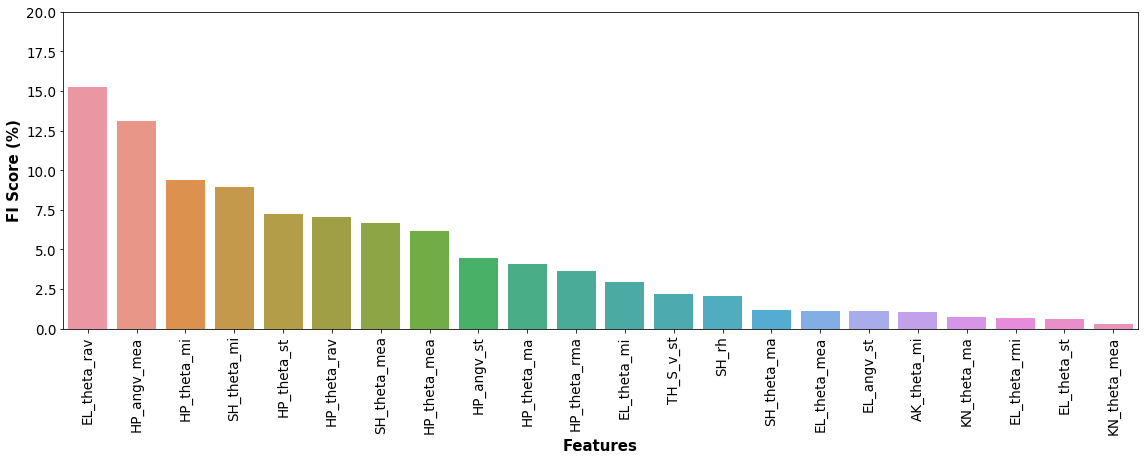

Train acc: 64.15891800507185 +/- 3.25144681101672 
Test acc: 90.38461538461539 +/- 5.202980484026417 
Test bacc: 84.61538461538461 +/- 6.661733875264912 
Test F1: 93.8198553583169 +/- 3.449014345457989 
Test FNR: 0.0 +/- 0.0 


In [221]:
# Run the model for multiple hyperparameter for regularization

train_acc = []
train_acc_sem = []

test_acc = []
test_acc_sem = []

test_bacc = []
test_bacc_sem = []

test_f1 = []
test_f1_sem = []

test_fnr = []
test_fnr_sem = []

# Parameter set
# Random Forest max depth (md)
# md = [ 0.65, 0.75, 0.8, 0.9, 1] # 13m
md = [1, 2, 3, 3.5, 4, 4.5, 5, 7, 10]  #4m

for c in [2.5]:#md:
    # define model
    rf = RandomForestClassifier(n_estimators=500,
                                criterion='gini',
                                max_depth=c,
                                min_samples_split=0.00001,
                                min_samples_leaf=5,
                                min_weight_fraction_leaf=0.0,
                                max_features='log2',
                                min_impurity_decrease=0.0,
                                bootstrap=True,
                                oob_score=True,
                                verbose=0,
                                warm_start=True,
                                ccp_alpha=0.0,
                                random_state=1234
                                )
    # Run simulation (cross validation)
    tr_acc, ts_acc, ts_bacc, ts_f1, ts_fnr, y_pred, y_pred_proba, \
    accuracy, bac, feature_imp_4m_l, mfi = loocv(df_4m_imp, rf, p = 1, scaler = MinMaxScaler(), \
                          bootstrap = 'y', bstp_n =650, mu=0.00,  sigma = 0.38, \
                          with_pca = 'n', averaging = 'n')

    train_acc.append(np.mean(tr_acc)*100)
    train_acc_sem.append(sem(tr_acc)*100)
    
    test_acc.append(np.mean(ts_acc)*100)
    test_acc_sem.append(sem(ts_acc)*100)
    
    test_bacc.append(np.mean(ts_bacc)*100)
    test_bacc_sem.append(sem(ts_bacc)*100)
    
    test_f1.append(np.mean(ts_f1)*100)
    test_f1_sem.append(sem(ts_f1)*100)
    
    test_fnr.append(np.mean(ts_fnr)*100)
    test_fnr_sem.append(sem(ts_fnr)*100)

print('Train acc: {} +/- {} '.format(train_acc[0],train_acc_sem[0]))
print('Test acc: {} +/- {} '.format(test_acc[0],test_acc_sem[0]))
print('Test bacc: {} +/- {} '.format(test_bacc[0],test_bacc_sem[0]))
print('Test F1: {} +/- {} '.format(test_f1[0],test_f1_sem[0]))
print('Test FNR: {} +/- {} '.format(test_fnr[0],test_fnr_sem[0]))

In [250]:
col_list_imp_13m = list(FI.sort_values(by = '13m_BL', ascending = False).iloc[:30,0])
df_13m_imp = df_13m.loc[:,col_list_imp_13m]
df_13m_imp

SH_rh   AK_v_mea     IL_C_  \
animal_id gentyp age genotype l_vs_r                                   
306       1      1   0        'left'   1.581642  19.077597  4.950996   
                              'left'   2.435294  19.369980  3.185699   
                              'left'   2.433476  19.980852  1.776562   
                              'right'  2.909112  21.756912  2.227022   
                              'right'  3.335040  21.957384  2.632309   
...                                         ...        ...       ...   
738       1      1   0        'right'  2.802425  14.195377  3.290249   
                              'right'  1.855996  14.291489  3.188341   
                              'right'  3.978410  15.772151  3.353980   
                              'right'  2.352313  13.086418  3.155080   
                              'right'  4.060222  14.311346  2.981593   

                                        FT_v_mea  KN_theta_mea  EL_angv_mea  \
animal_id gentyp age genotype l_vs_r                                          
306       1      1   0        'left'   29.181538     62.636788   543.532084   
                              'left'   30.211587     64.881317   514.981555   
                              'left'   28.697294     62.806137   426.681440   
                              'right'  30.958979     73.351455   703.281884   
                              'right'  29.989154     76.091028   562.488782   
...                                          ...           ...          ...   
738       1      1   0        'right'  23.560646     77.909037   428.300870   
                              'right'  21.372765     80.299494   399.160436   
                              'right'  22.020850     77.418143   399.911304   
                              'right'  21.819963     74.745987   391.429783   
                              'right'  21.773191     78.637804   406.272112   

                                       HP_theta_rav  SH_theta_ma  EL_angv_st  \
animal_id gentyp age genotype l_vs_r                                           
306       1      1   0        'left'      89.157850    89.660363  476.124616   
                              'left'      88.294713    86.659884  478.610753   
                              'left'      89.194452    83.329309  263.060196   
                              'right'     98.103083   104.333869  453.341620   
                              'right'    101.977320   104.605501  369.785123   
...                                             ...          ...         ...   
738       1      1   0        'right'     92.666926    94.892171  493.659752   
                              'right'     92.745555    93.724444  419.298485   
                              'right'     94.029672    91.545626  502.163148   
                              'right'     94.948472    96.384303  353.144524   
                              'right'     91.259074   101.261512  471.132391   

                                       KN_theta_ma  ...  HP_theta_mi  \
animal_id gentyp age genotype l_vs_r                ...                
306       1      1   0        'left'     86.028928  ...    72.610861   
                              'left'     88.116702  ...    71.824333   
                              'left'     90.986496  ...    69.715473   
                              'right'    98.410234  ...    76.428339   
                              'right'    96.456690  ...    76.428339   
...                                            ...  ...          ...   
738       1      1   0        'right'   108.742195  ...    92.257469   
                              'right'   108.742195  ...    93.270863   
                              'right'   107.029761  ...    94.318109   
                              'right'   102.273611  ...    94.882098   
                              'right'   111.004280  ...    94.553904   

                                       EL_theta_st  AK_trajectory_lengt  \
animal_id gentyp age gen

Accuracy: 0.95
Balanced Accuracy: 0.95


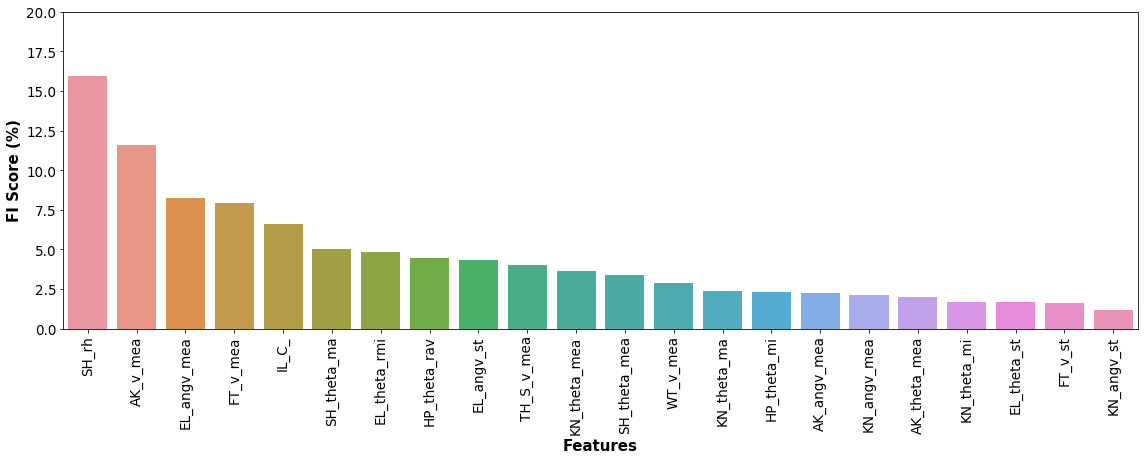

Train acc: 76.60025051082043 +/- 2.6322202168139857 
Test acc: 99.33333333333333 +/- 0.4542567625794984 
Test bacc: 93.33333333333333 +/- 4.5425676257949785 
Test F1: 99.65811965811966 +/- 0.23295218593820427 
Test FNR: 0.0 +/- 0.0 


In [230]:
# Run the model for multiple hyperparameter for regularization

train_acc = []
train_acc_sem = []

test_acc = []
test_acc_sem = []

test_bacc = []
test_bacc_sem = []

test_f1 = []
test_f1_sem = []

test_fnr = []
test_fnr_sem = []

# Parameter set
# Random Forest max depth (md)
# md = [ 0.65, 0.75, 0.8, 0.9, 1] # 13m
md = [1, 2, 3, 3.5, 4, 4.5, 5, 7, 10]  #4m

for c in [4]:#md:
    # define model
    rf = RandomForestClassifier(n_estimators=500,
                                criterion='gini',
                                max_depth=c,
                                min_samples_split=0.00001,
                                min_samples_leaf=6,
                                min_weight_fraction_leaf=0.0,
                                max_features='log2',
                                min_impurity_decrease=0.0,
                                bootstrap=True,
                                oob_score=True,
                                verbose=0,
                                warm_start=True,
                                ccp_alpha=0.0,
                                random_state=1234
                                )
    # Run simulation (cross validation)
    tr_acc, ts_acc, ts_bacc, ts_f1, ts_fnr, y_pred, y_pred_proba, \
    accuracy, bac, feature_imp_4m_l, mfi = loocv(df_13m_imp, rf, p = 1, scaler = MinMaxScaler(), \
                          bootstrap = 'y', bstp_n =650, mu=0.4,  sigma = 0.1, \
                          with_pca = 'n', averaging = 'n')

    train_acc.append(np.mean(tr_acc)*100)
    train_acc_sem.append(sem(tr_acc)*100)
    
    test_acc.append(np.mean(ts_acc)*100)
    test_acc_sem.append(sem(ts_acc)*100)
    
    test_bacc.append(np.mean(ts_bacc)*100)
    test_bacc_sem.append(sem(ts_bacc)*100)
    
    test_f1.append(np.mean(ts_f1)*100)
    test_f1_sem.append(sem(ts_f1)*100)
    
    test_fnr.append(np.mean(ts_fnr)*100)
    test_fnr_sem.append(sem(ts_fnr)*100)

print('Train acc: {} +/- {} '.format(train_acc[0],train_acc_sem[0]))
print('Test acc: {} +/- {} '.format(test_acc[0],test_acc_sem[0]))
print('Test bacc: {} +/- {} '.format(test_bacc[0],test_bacc_sem[0]))
print('Test F1: {} +/- {} '.format(test_f1[0],test_f1_sem[0]))
print('Test FNR: {} +/- {} '.format(test_fnr[0],test_fnr_sem[0]))

In [251]:
col_list_perm_4m = list(FI.sort_values(by = 'perm_4m_BL', ascending = False).iloc[:30,0])
df_4m_perm = df_4m.loc[:,col_list_perm_4m]

Accuracy: 1.0
Balanced Accuracy: 1.0


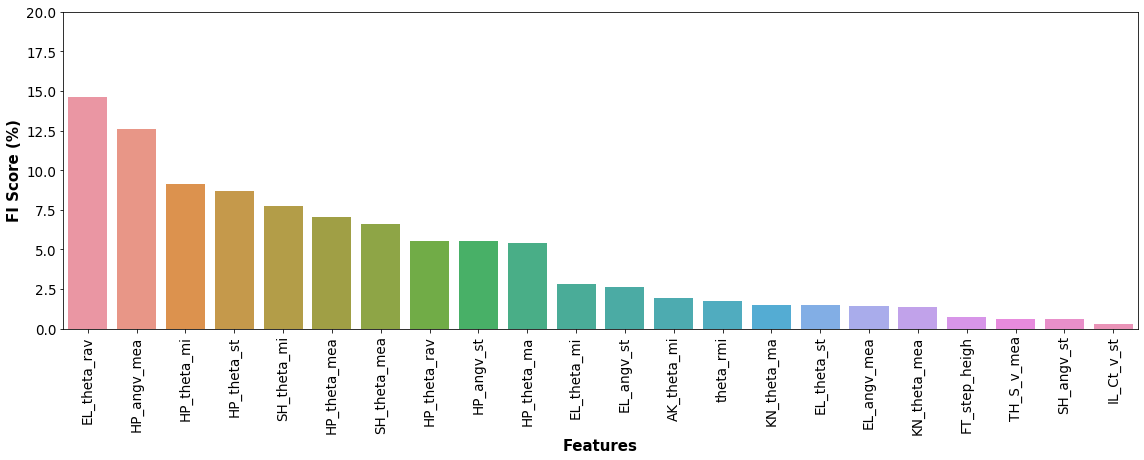

Train acc: 68.50380388841928 +/- 3.0185958804207016 
Test acc: 88.84615384615385 +/- 6.678367443917438 
Test bacc: 84.61538461538461 +/- 6.661733875264912 
Test F1: 91.99049563422032 +/- 4.959312472229835 
Test FNR: 0.0 +/- 0.0 


In [237]:
# Run the model for multiple hyperparameter for regularization

train_acc = []
train_acc_sem = []

test_acc = []
test_acc_sem = []

test_bacc = []
test_bacc_sem = []

test_f1 = []
test_f1_sem = []

test_fnr = []
test_fnr_sem = []

# Parameter set
# Random Forest max depth (md)
# md = [ 0.65, 0.75, 0.8, 0.9, 1] # 13m
md = [1, 2, 3, 3.5, 4, 4.5, 5, 7, 10]  #4m

for c in [3]:#md:
    # define model
    rf = RandomForestClassifier(n_estimators=500,
                                criterion='gini',
                                max_depth=c,
                                min_samples_split=0.00001,
                                min_samples_leaf=5,
                                min_weight_fraction_leaf=0.0,
                                max_features='log2',
                                min_impurity_decrease=0.0,
                                bootstrap=True,
                                oob_score=True,
                                verbose=0,
                                warm_start=True,
                                ccp_alpha=0.0,
                                random_state=1234
                                )
    # Run simulation (cross validation)
    tr_acc, ts_acc, ts_bacc, ts_f1, ts_fnr, y_pred, y_pred_proba, \
    accuracy, bac, feature_imp_4m_l, mfi = loocv(df_4m_perm, rf, p = 1, scaler = MinMaxScaler(), \
                          bootstrap = 'y', bstp_n =650, mu=0.00,  sigma = 0.38, \
                          with_pca = 'n', averaging = 'n')

    train_acc.append(np.mean(tr_acc)*100)
    train_acc_sem.append(sem(tr_acc)*100)
    
    test_acc.append(np.mean(ts_acc)*100)
    test_acc_sem.append(sem(ts_acc)*100)
    
    test_bacc.append(np.mean(ts_bacc)*100)
    test_bacc_sem.append(sem(ts_bacc)*100)
    
    test_f1.append(np.mean(ts_f1)*100)
    test_f1_sem.append(sem(ts_f1)*100)
    
    test_fnr.append(np.mean(ts_fnr)*100)
    test_fnr_sem.append(sem(ts_fnr)*100)

print('Train acc: {} +/- {} '.format(train_acc[0],train_acc_sem[0]))
print('Test acc: {} +/- {} '.format(test_acc[0],test_acc_sem[0]))
print('Test bacc: {} +/- {} '.format(test_bacc[0],test_bacc_sem[0]))
print('Test F1: {} +/- {} '.format(test_f1[0],test_f1_sem[0]))
print('Test FNR: {} +/- {} '.format(test_fnr[0],test_fnr_sem[0]))

In [252]:
col_list_perm_13m = list(FI.sort_values(by = 'perm_13m_BL', ascending = False).iloc[:30,0])
df_13m_perm = df_13m.loc[:,col_list_perm_13m]

Accuracy: 0.95
Balanced Accuracy: 0.95


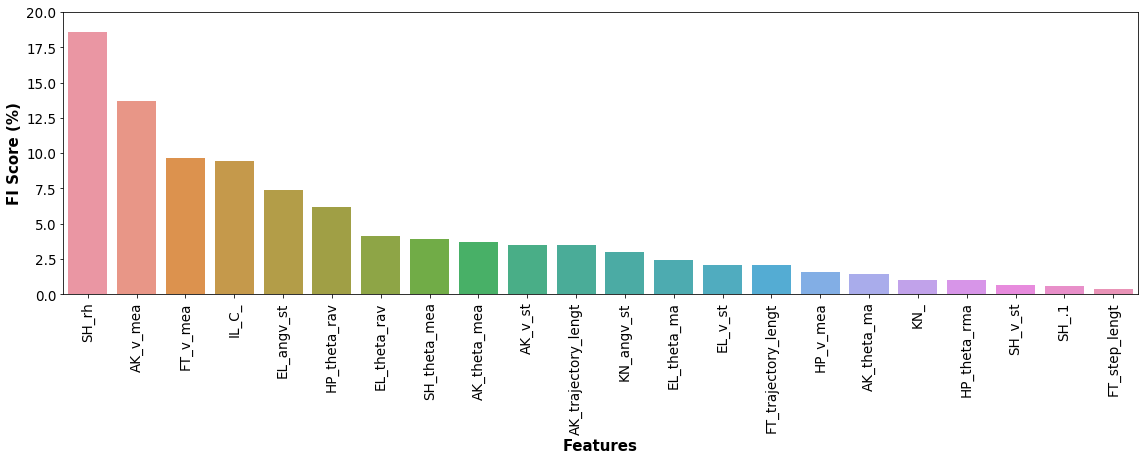

Train acc: 79.6696938856835 +/- 1.95356841371233 
Test acc: 99.0 +/- 0.7237468644557458 
Test bacc: 93.33333333333333 +/- 4.5425676257949785 
Test F1: 99.47818263607738 +/- 0.37916608099253973 
Test FNR: 0.0 +/- 0.0 


In [239]:
# Run the model for multiple hyperparameter for regularization

train_acc = []
train_acc_sem = []

test_acc = []
test_acc_sem = []

test_bacc = []
test_bacc_sem = []

test_f1 = []
test_f1_sem = []

test_fnr = []
test_fnr_sem = []

# Parameter set
# Random Forest max depth (md)
# md = [ 0.65, 0.75, 0.8, 0.9, 1] # 13m
md = [1, 2, 3, 3.5, 4, 4.5, 5, 7, 10]  #4m

for c in [4]:#md:
    # define model
    rf = RandomForestClassifier(n_estimators=500,
                                criterion='gini',
                                max_depth=c,
                                min_samples_split=0.00001,
                                min_samples_leaf=6,
                                min_weight_fraction_leaf=0.0,
                                max_features='log2',
                                min_impurity_decrease=0.0,
                                bootstrap=True,
                                oob_score=True,
                                verbose=0,
                                warm_start=True,
                                ccp_alpha=0.0,
                                random_state=1234
                                )
    # Run simulation (cross validation)
    tr_acc, ts_acc, ts_bacc, ts_f1, ts_fnr, y_pred, y_pred_proba, \
    accuracy, bac, feature_imp_4m_l, mfi = loocv(df_13m_perm, rf, p = 1, scaler = MinMaxScaler(), \
                          bootstrap = 'y', bstp_n =650, mu=0.4,  sigma = 0.1, \
                          with_pca = 'n', averaging = 'n')

    train_acc.append(np.mean(tr_acc)*100)
    train_acc_sem.append(sem(tr_acc)*100)
    
    test_acc.append(np.mean(ts_acc)*100)
    test_acc_sem.append(sem(ts_acc)*100)
    
    test_bacc.append(np.mean(ts_bacc)*100)
    test_bacc_sem.append(sem(ts_bacc)*100)
    
    test_f1.append(np.mean(ts_f1)*100)
    test_f1_sem.append(sem(ts_f1)*100)
    
    test_fnr.append(np.mean(ts_fnr)*100)
    test_fnr_sem.append(sem(ts_fnr)*100)

print('Train acc: {} +/- {} '.format(train_acc[0],train_acc_sem[0]))
print('Test acc: {} +/- {} '.format(test_acc[0],test_acc_sem[0]))
print('Test bacc: {} +/- {} '.format(test_bacc[0],test_bacc_sem[0]))
print('Test F1: {} +/- {} '.format(test_f1[0],test_f1_sem[0]))
print('Test FNR: {} +/- {} '.format(test_fnr[0],test_fnr_sem[0]))

In [254]:
col_list_intersect_4m = list(set(df_4m_perm).intersection(set(df_4m_imp)))
df_4m_intersect = df_4m.loc[:,col_list_intersect_4m]
df_4m_intersect.shape

(280, 23)

In [255]:
col_list_intersect_13m = list(set(df_13m_perm).intersection(set(df_13m_imp)))
df_13m_intersect = df_13m.loc[:,col_list_intersect_13m]
df_13m_intersect.shape

(302, 14)

Accuracy: 0.45
Balanced Accuracy: 0.45


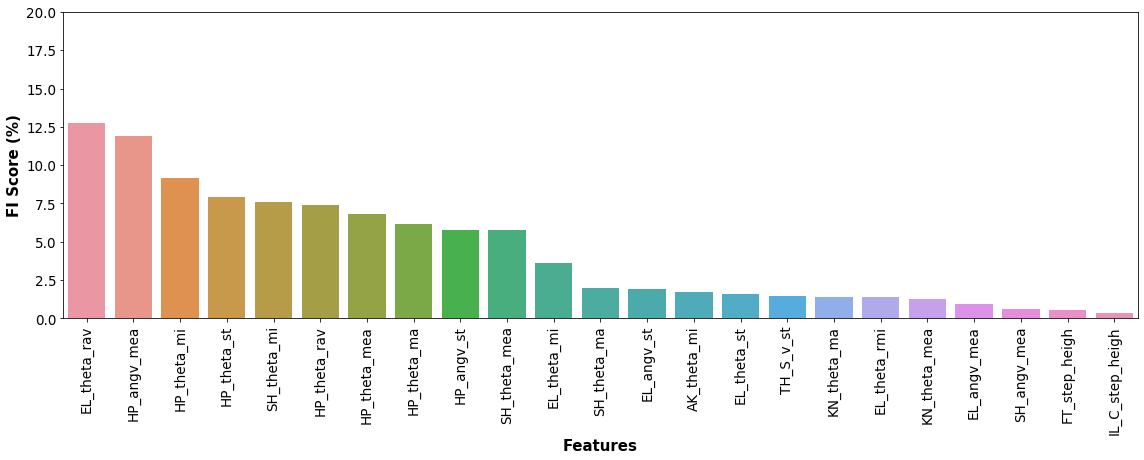

Train acc: 63.86306001690616 +/- 3.2032360752480162 
Test acc: 85.38461538461539 +/- 7.8744462251676595 
Test bacc: 88.46153846153845 +/- 6.081303192631498 
Test F1: 89.03625110521662 +/- 6.076078531751962 
Test FNR: 0.0 +/- 0.0 


In [269]:
# Run the model for multiple hyperparameter for regularization

train_acc = []
train_acc_sem = []

test_acc = []
test_acc_sem = []

test_bacc = []
test_bacc_sem = []

test_f1 = []
test_f1_sem = []

test_fnr = []
test_fnr_sem = []

# Parameter set
# Random Forest max depth (md)
# md = [ 0.65, 0.75, 0.8, 0.9, 1] # 13m
md = [1, 2, 3, 3.5, 4, 4.5, 5, 7, 10]  #4m

for c in [3.2]:#md:
    # define model
    rf = RandomForestClassifier(n_estimators=500,
                                criterion='gini',
                                max_depth=c,
                                min_samples_split=0.00001,
                                min_samples_leaf=5,
                                min_weight_fraction_leaf=0.0,
                                max_features='log2',
                                min_impurity_decrease=0.0,
                                bootstrap=True,
                                oob_score=True,
                                verbose=0,
                                warm_start=True,
                                ccp_alpha=0.0,
                                random_state=1234
                                )
    # Run simulation (cross validation)
    tr_acc, ts_acc, ts_bacc, ts_f1, ts_fnr, y_pred, y_pred_proba, \
    accuracy, bac, feature_imp_4m_l, mfi = loocv(df_4m_intersect, rf, p = 1, scaler = MinMaxScaler(), \
                          bootstrap = 'y', bstp_n =650, mu=0.00,  sigma = 0.39, \
                          with_pca = 'n', averaging = 'n')

    train_acc.append(np.mean(tr_acc)*100)
    train_acc_sem.append(sem(tr_acc)*100)
    
    test_acc.append(np.mean(ts_acc)*100)
    test_acc_sem.append(sem(ts_acc)*100)
    
    test_bacc.append(np.mean(ts_bacc)*100)
    test_bacc_sem.append(sem(ts_bacc)*100)
    
    test_f1.append(np.mean(ts_f1)*100)
    test_f1_sem.append(sem(ts_f1)*100)
    
    test_fnr.append(np.mean(ts_fnr)*100)
    test_fnr_sem.append(sem(ts_fnr)*100)

print('Train acc: {} +/- {} '.format(train_acc[0],train_acc_sem[0]))
print('Test acc: {} +/- {} '.format(test_acc[0],test_acc_sem[0]))
print('Test bacc: {} +/- {} '.format(test_bacc[0],test_bacc_sem[0]))
print('Test F1: {} +/- {} '.format(test_f1[0],test_f1_sem[0]))
print('Test FNR: {} +/- {} '.format(test_fnr[0],test_fnr_sem[0]))

Accuracy: 0.95
Balanced Accuracy: 0.95


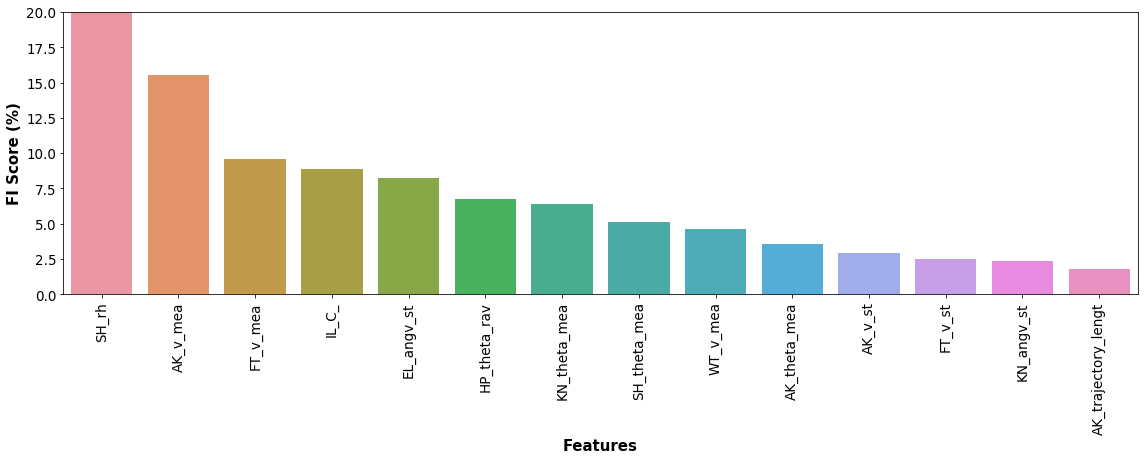

Train acc: 72.14463097684975 +/- 1.9958070753860075 
Test acc: 99.33333333333333 +/- 0.4542567625794984 
Test bacc: 93.33333333333333 +/- 4.5425676257949785 
Test F1: 99.65811965811966 +/- 0.23295218593820427 
Test FNR: 0.0 +/- 0.0 


In [263]:
# Run the model for multiple hyperparameter for regularization

train_acc = []
train_acc_sem = []

test_acc = []
test_acc_sem = []

test_bacc = []
test_bacc_sem = []

test_f1 = []
test_f1_sem = []

test_fnr = []
test_fnr_sem = []

# Parameter set
# Random Forest max depth (md)
# md = [ 0.65, 0.75, 0.8, 0.9, 1] # 13m
md = [1, 2, 3, 3.5, 4, 4.5, 5, 7, 10]  #4m

for c in [4.5]:#md:
    # define model
    rf = RandomForestClassifier(n_estimators=500,
                                criterion='gini',
                                max_depth=c,
                                min_samples_split=0.00001,
                                min_samples_leaf=6,
                                min_weight_fraction_leaf=0.0,
                                max_features='log2',
                                min_impurity_decrease=0.0,
                                bootstrap=True,
                                oob_score=True,
                                verbose=0,
                                warm_start=True,
                                ccp_alpha=0.0,
                                random_state=1234
                                )
    # Run simulation (cross validation)
    tr_acc, ts_acc, ts_bacc, ts_f1, ts_fnr, y_pred, y_pred_proba, \
    accuracy, bac, feature_imp_4m_l, mfi = loocv(df_13m_intersect, rf, p = 1, scaler = MinMaxScaler(), \
                          bootstrap = 'y', bstp_n =650, mu=0.42,  sigma = 0.1, \
                          with_pca = 'n', averaging = 'n')

    train_acc.append(np.mean(tr_acc)*100)
    train_acc_sem.append(sem(tr_acc)*100)
    
    test_acc.append(np.mean(ts_acc)*100)
    test_acc_sem.append(sem(ts_acc)*100)
    
    test_bacc.append(np.mean(ts_bacc)*100)
    test_bacc_sem.append(sem(ts_bacc)*100)
    
    test_f1.append(np.mean(ts_f1)*100)
    test_f1_sem.append(sem(ts_f1)*100)
    
    test_fnr.append(np.mean(ts_fnr)*100)
    test_fnr_sem.append(sem(ts_fnr)*100)

print('Train acc: {} +/- {} '.format(train_acc[0],train_acc_sem[0]))
print('Test acc: {} +/- {} '.format(test_acc[0],test_acc_sem[0]))
print('Test bacc: {} +/- {} '.format(test_bacc[0],test_bacc_sem[0]))
print('Test F1: {} +/- {} '.format(test_f1[0],test_f1_sem[0]))
print('Test FNR: {} +/- {} '.format(test_fnr[0],test_fnr_sem[0]))